# PROJECT 1

## Does a Relationship Exist Between Restaurant Density and Personal Income Per Capita?

### 1. Introduction
It is no question that fast food restaurants make up a generous portion of the United States' GDP. Due to it's low production cost and great taste, fast food is sold at a low cost, further increasing it's vast popularity. According to specific assumptions made in microeconomics, fast food is an inferior good; meaning as an individual's income increases the rate of purchases that are made on fast food will deccrease. Restaurant density is the proportion of restaurants to population. This shows the concentration of restaurants in a given area. Also, burgers are reported to be the most common purchased fast food. Thus, I want to investigate the correlation between restaurant density(independant variable) and income per capita(outcome) in a given state. I will also investigate burger restaurant density(independant variable) in order to observe it's relationship with income per capita has with restaurant_density.

The original fast food dataset was imported from Kaggle. Due to the absence of the variable income per capita, it is necesserry to import online datasets that contain population and per capita income. Additionally, using the Bureau of Economic Analysis database, I was able to import and eventually merge this dataframe to a new dataset consisting of all necessary variables to solve this question.

NOTE: I originally wanted to investigate the correlation between restaurant density and income per capita in a given city instead of a state in order to have more datapoints; however, I ran in to difficulties. I will first outline my original process and show what happened, in order to prove that it was most feasible to group corresponding data frames by state instead.


### 2. Import Packages

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np




### 3. Import and Read in Datasets

In [3]:
restaurants = pd.read_csv('Datasets/Datafiniti_Fast_Food_Restaurants_May19.csv')
income = pd.read_csv('Datasets/county_income.csv')


In [4]:
print(restaurants.shape)
pd.set_option("max_colwidth",200)
restaurants.head()

(10000, 16)


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website


In [5]:
print(income.shape)
income.head()

(9420, 5)


,GeoFips,GeoName,LineCode,Description,2019
0,1001,"Autauga, AL",1,Personal income (thousands of dollars),2474364
1,1001,"Autauga, AL",2,Population (persons) 1/,55769
2,1001,"Autauga, AL",3,Per capita personal income (dollars) 2/,44368
3,1003,"Baldwin, AL",1,Personal income (thousands of dollars),10791564
4,1003,"Baldwin, AL",2,Population (persons) 1/,223565


It is evident that some of the data must be cleaned in our income dataframe. Firstly, it is evident that the values of the 'Description' variables should be columns and the newly added columns will take values corresponding to the '2019' column.

In [6]:
income = income.pivot(values='2019', index='GeoName', columns='Description').reset_index()
income.head()

Description,GeoName,Per capita personal income (dollars) 2/,Personal income (thousands of dollars),Population (persons) 1/
0,"Abbeville, SC",35065,862034,24584
1,"Acadia, LA",37337,2322653,62207
2,"Accomack, VA",49695,1606389,32325
3,"Ada, ID",54506,26265476,481880
4,"Adair, IA",51911,368672,7102


Now, I want to find the number of restaurants grouped by each city and create a new data frame that contains values of a given city in the United states and the number of restaurants that city contains.

In [7]:
rest_count = restaurants.groupby(['city', 'province']).size().reset_index() 
rest_count['GeoName'] = rest_count['city'] + ", " + rest_count['province']
rest_count = rest_count.rename({0: 'num_restaurants'}, axis = 1)
rest_count = rest_count[['GeoName', 'num_restaurants']]
rest_count



,GeoName,num_restaurants
0,"Abbeville, AL",2
1,"Abbeville, SC",1
2,"Aberdeen, MD",1
3,"Aberdeen, NC",1
4,"Aberdeen, WA",3
...,...,...
3412,"Zanesville, OH",6
3413,"Zebulon, GA",1
3414,"Zelienople, PA",1
3415,"Zephyrhills, FL",1


Finally, I can merge the income dataframe and the rest_count data frame. Notice once I merge, I lose alot of data as there are now only 284 rows. This means that the income database and the original dataset('restaurants') only have 284 common cities. Due to the loss of data, it is unfeasible to work with an even smaller sample size. Therefore, I grouped by state instead of city.  

In [8]:
Rest_city = pd.merge(income, rest_count, on="GeoName")
Rest_city 

,GeoName,Per capita personal income (dollars) 2/,Personal income (thousands of dollars),Population (persons) 1/,num_restaurants
0,"Abbeville, SC",35065,862034,24584,1
1,"Aiken, SC",44503,7623405,171300,4
2,"Aitkin, MN",41614,659213,15841,1
3,"Alameda, CA",78839,131535494,1668412,3
4,"Alamosa, CO",38403,622131,16200,1
...,...,...,...,...,...
279,"Winnebago, IL",43972,12420505,282465,1
280,"Yakima, WA",43910,11045587,251552,11
281,"Yankton, SD",51910,1185459,22837,1
282,"York, NE",50703,690164,13612,1


The Bureau of Econbomic Analysis Database allowed me to import the same dataset grouped by state instead of city. I import the files and organize/clean the data using similar methods with the previous dataframe. 

In [9]:
income_state = pd.read_csv("Datasets/income_state.csv")
income_state["State"] = income_state.GeoName.str.replace(" \*", "")
state = pd.read_csv("Datasets/state_abbreviations.csv")
income_state = pd.merge(income_state, state, on='State')
income_state = income_state.pivot(values='2019', index='Code', columns='Description').reset_index()
print(income_state.shape)
income_state.head()


(51, 4)


/var/folders/dl/pkdj8n7n6ps84w7d_v3vr0200000gn/T/ipykernel_712/4290504551.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  income_state["State"] = income_state.GeoName.str.replace(" \*", "")


Description,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/
0,AK,41899.7,57115.0,733603.0
1,AL,196131.2,39962.0,4907965.0
2,AR,122878.1,40675.0,3020985.0
3,AZ,300174.7,41166.0,7291843.0
4,CA,2172607.7,55090.0,39437610.0


Now that I cleaned the dataframe grouped by state, I found the number of restaurants for each state. Then, I merged 'income_state' dataframe and the 'rest_count' dataframe which contains the number of restaurants in a given state. 

In [10]:
rest_count = restaurants.groupby(['province']).size().reset_index() 
rest_count.columns = ['Code', 'num_restaurants']
temp = pd.merge(income_state, rest_count, on='Code', how="outer")
temp.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants
0,AK,41899.7,57115.0,733603.0,64.0
1,AL,196131.2,39962.0,4907965.0,635.0
2,AR,122878.1,40675.0,3020985.0,124.0
3,AZ,300174.7,41166.0,7291843.0,186.0
4,CA,2172607.7,55090.0,39437610.0,727.0


Furthermore, I have found the number of burger restaurants in a given state. I included this data in to the previous dataframe. additionally, I have mutated two columns, 'rest_burger_density' and 'restaurant_density'. I finally initialized my main dataframe as it contains all variables I need to perform data analysis, visualizations and predictions.

In [11]:
burger_restaurants = restaurants.loc[restaurants.categories.str.lower().str.contains("burger")]
burger_restaurants = burger_restaurants.groupby('province').size().reset_index()
burger_restaurants.columns = ['Code', 'num_burger_restaurants']
df_main = pd.merge(temp, burger_restaurants, on='Code', how = 'left')
df_main['num_burger_restaurants'] = df_main.num_burger_restaurants.fillna(0)
df_main['num_restaurants'] = df_main.num_restaurants.fillna(0)
df_main['restaurant_density'] = df_main['num_restaurants'] / df_main['Population (persons) 1/']
df_main['burger_rest_density'] = df_main['num_burger_restaurants'] / df_main['Population (persons) 1/']
df_main.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density
0,AK,41899.7,57115.0,733603.0,64.0,14.0,8.724065e-05,1.908389e-05
1,AL,196131.2,39962.0,4907965.0,635.0,221.0,1.293815e-04,4.502885e-05
2,AR,122878.1,40675.0,3020985.0,124.0,49.0,4.104622e-05,1.621988e-05
3,AZ,300174.7,41166.0,7291843.0,186.0,81.0,2.550795e-05,1.110830e-05
4,CA,2172607.7,55090.0,39437610.0,727.0,237.0,1.843418e-05,6.009492e-06
5,CO,307650.9,53426.0,5758486.0,154.0,58.0,2.674314e-05,1.007209e-05
6,CT,228907.2,64191.0,3566022.0,1.0,0.0,2.804245e-07,0.000000e+00
7,DC,48057.5,67854.0,708253.0,18.0,4.0,2.541465e-05,5.647699e-06
8,DE,46326.7,47433.0,976668.0,25.0,7.0,2.559723e-05,7.167226e-06
9,FL,1019697.9,47445.0,21492056.0,739.0,183.0,3.438480e-05,8.514774e-06


### 4. Summary Statistics

Lets view the summary statistics on 'num_restaurants' and 'restaurant_density' in order to later analyze which one is a better predictor

In [12]:
df_main[['Per capita disposable personal income (dollars) 2/', 'restaurant_density', 'burger_rest_density']].describe()

,Per capita disposable personal income (dollars) 2/,restaurant_density,burger_rest_density
count,51.000000,51.000000,51.000000
mean,48409.431373,0.000034,0.000011
std,6983.845002,0.000026,0.000008
min,36031.000000,0.000000,0.000000
25%,43786.500000,0.000019,0.000006
50%,47433.000000,0.000031,0.000011
75%,52264.000000,0.000039,0.000015
max,67854.000000,0.000129,0.000045


### 5. Visualization

<AxesSubplot:xlabel='restaurant_density', ylabel='Per capita disposable personal income (dollars) 2/'>

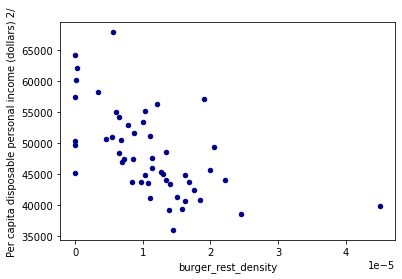

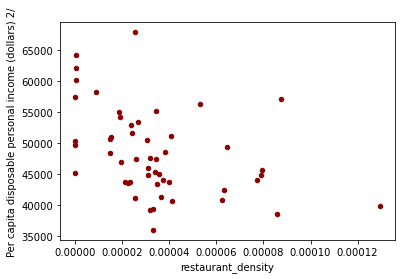

In [13]:
df_main.plot.scatter(x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/', c='DarkBlue')
df_main.plot.scatter(x='restaurant_density', y='Per capita disposable personal income (dollars) 2/', c='DarkRed')


array([[<AxesSubplot:title={'center':'burger_rest_density'}>]],
      dtype=object)

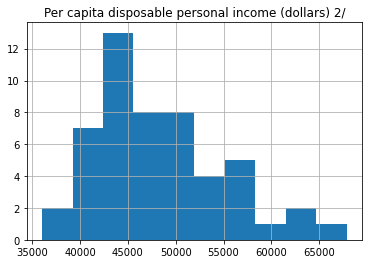

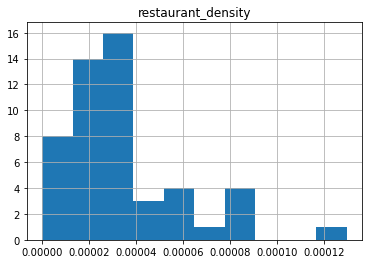

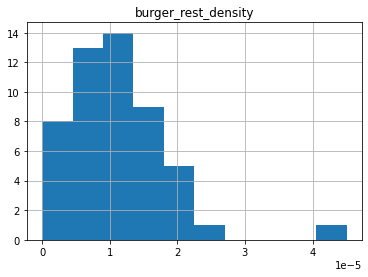

In [14]:
df_main.hist(column='Per capita disposable personal income (dollars) 2/')
df_main.hist(column = 'restaurant_density')
df_main.hist(column= 'burger_rest_density')

# PROJECT 2

## Does a Relationship Exist Between Restaurant Density and Personal Income Per Capita?

## 1. Updated Project 1


### 0. Feedback
- Interpretation on graphs (1-2 sentences on findings)
- Incorporate more comments after output

### 1. Introduction
It is no question that fast food restaurants make up a generous portion of the United States' GDP. Due to it's low production cost and great taste, fast food is sold at a low cost, further increasing it's vast popularity. According to specific assumptions made in microeconomics, fast food is an inferior good; meaning as an individual's income increases the rate of purchases that are made on fast food will deccrease. Restaurant density is the proportion of restaurants to population. This shows the concentration of restaurants in a given area. Also, burgers are reported to be the most common purchased fast food. Thus, I want to investigate the correlation between burger restaurant density(independant variable) and income per capita(outcome) in a given state.

The original fast food dataset was imported from Kaggle. Due to the absence of the variable income per capita, it is necesserry to import online datasets that contain population and per capita income. Additionally, using the Bureau of Economic Analysis database, I was able to import and eventually merge this dataframe to a new dataset consisting of all necessary variables to solve this question.

### 2. Import Packages

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pylab as plt
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib 



### 3. Import and Read Datasets

In [16]:
restaurants = pd.read_csv('Datasets/Datafiniti_Fast_Food_Restaurants_May19.csv')
income_state = pd.read_csv("Datasets/income_state.csv")
state = pd.read_csv("Datasets/state_abbreviations.csv")

The 'restaurants' dataset shows over 10,000 restaurants in the United States, showing their names, location points (city, stat, longitude, latitude, postal code), id, date added to dataset, date updated, website, source URL and the food category. 

In [17]:
print(restaurants.shape)
pd.set_option("max_colwidth",200)
restaurants.head()

(10000, 16)


,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AWrSh_KgsVYjT2BJAzaH,2019-05-19T23:58:05Z,2019-05-19T23:58:05Z,2555 11th Avenue,"Fast Food Restaurants,Hamburgers and Hot Dogs,Restaurants",Accommodation & Food Services,Greeley,US,us/co/greeley/255511thavenue/554191587,40.39629,-104.69699,Carl's Jr.,80631,CO,https://www.yellowpages.com/greeley-co/mip/carls-jr-7001402,https://www.carlsjr.com/?utm_source=Yextandutm_medium=Visit%20Websiteandutm_campaign=Homepage
1,AWEKlA-LIxWefVJwxG9B,2018-01-18T18:30:23Z,2019-05-19T23:45:05Z,2513 Highway 6 And 50,"Restaurant,Mexican Restaurants,Fast Food Restaurants,Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/2513highway6and50/1550891556,39.08135,-108.58689,Del Taco,81505,CO,"http://www.citysearch.com/profile/772076870/grand_junction_co/del_taco.html,https://www.yellowpages.com/grand-junction-co/mip/del-taco-475739804,https://www.tripadvisor.com/Restaurant_Review-g3345...",http://www.deltaco.com
2,AWrSfAcYsVYjT2BJAzPt,2019-05-19T23:45:04Z,2019-05-19T23:45:04Z,1125 Patterson Road,"Sandwich Shops,Fast Food Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Grand Junction,US,us/co/grandjunction/1125pattersonroad/-2137447852,39.09148,-108.55411,Which Wich,81506,CO,https://www.yellowpages.com/grand-junction-co/mip/which-wich-481453650,http://www.whichwich.com
3,AWrSa3NAQTFama1Xpkbz,2019-05-19T23:26:58Z,2019-05-19T23:26:58Z,3455 N Salida Court,"Fast Food Restaurants,Mexican Restaurants,Restaurants,Take Out Restaurants",Accommodation & Food Services,Aurora,US,us/co/aurora/3455nsalidacourt/1143321601,39.76369,-104.77671,Chipotle Mexican Grill,80011,CO,https://www.yellowpages.com/aurora-co/mip/chipotle-mexican-grill-537241840,http://www.chipotle.com
4,AWrSaVGzZ4Yw-wtdgcaB,2019-05-19T23:24:38Z,2019-05-19T23:24:38Z,5225 E Colfax Avenue,"Fast Food Restaurants,Mexican Restaurants,Restaurants",Accommodation & Food Services,Denver,US,us/co/denver/5225ecolfaxavenue/-864103396,39.74044,-104.92636,Taco Bell,80220,CO,https://www.yellowpages.com/denver-co/mip/taco-bell-459444587,https://locations.tacobell.com/co/denver/5225-e-colfax-ave.html?utm_source=yextandutm_campaign=yextpowerlistingsandutm_medium=referralandutm_term=004051andutm_content=website


This dataset shows the disposable income, population and disposable income per capita in each state in the year 2019

In [18]:
print(income_state.shape)
income_state.head()

(180, 5)


,GeoFips,GeoName,LineCode,Description,2019
0,0,United States *,51,Disposable personal income (millions of dollars),16199181.0
1,0,United States *,52,Population (persons) 1/,328329953.0
2,0,United States *,53,Per capita disposable personal income (dollars) 2/,49338.0
3,1000,Alabama,51,Disposable personal income (millions of dollars),196131.2
4,1000,Alabama,52,Population (persons) 1/,4907965.0


This dataset lists the states in the United States, their abbreviation and code.

In [19]:
print(state.shape)
state.head()

(51, 3)


,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


### 4. Data Cleaning

I want to mege 'income_state' with 'state' on the column name 'state' in order to eventually merge with the columns used in 'restaruants'. However, before i merge, I must remove the '*' next to some state names in 'income_state'. Once this is done, I can merge with 'state'.

In [20]:
income_state = pd.read_csv("Datasets/income_state.csv")
income_state["State"] = income_state.GeoName.str.replace(" \*", "")
state = pd.read_csv("Datasets/state_abbreviations.csv")
income_state = pd.merge(income_state, state, on='State')
income_state.head()

/var/folders/dl/pkdj8n7n6ps84w7d_v3vr0200000gn/T/ipykernel_712/2456924109.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  income_state["State"] = income_state.GeoName.str.replace(" \*", "")


,GeoFips,GeoName,LineCode,Description,2019,State,Abbrev,Code
0,1000,Alabama,51,Disposable personal income (millions of dollars),196131.2,Alabama,Ala.,AL
1,1000,Alabama,52,Population (persons) 1/,4907965.0,Alabama,Ala.,AL
2,1000,Alabama,53,Per capita disposable personal income (dollars) 2/,39962.0,Alabama,Ala.,AL
3,2000,Alaska *,51,Disposable personal income (millions of dollars),41899.7,Alaska,Alaska,AK
4,2000,Alaska *,52,Population (persons) 1/,733603.0,Alaska,Alaska,AK


 When looking at the 'income_state'(Disposable income grouped by state) dataframe, it is evident that some of the data must be cleaned in our income dataframe. Firstly, it is evident that the values of the 'Description' variables should be columns and the newly added columns will take values corresponding to the '2019' column.

In [21]:
income_state = income_state.pivot(values='2019', index='Code', columns='Description').reset_index()
print(income_state.shape)
income_state.head()

(51, 4)


Description,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/
0,AK,41899.7,57115.0,733603.0
1,AL,196131.2,39962.0,4907965.0
2,AR,122878.1,40675.0,3020985.0
3,AZ,300174.7,41166.0,7291843.0
4,CA,2172607.7,55090.0,39437610.0


Now that I cleaned the dataframe grouped by state, I found the number of restaurants for each state. Then, I merged 'income_state' dataframe and the 'rest_count' dataframe which contains the number of restaurants in a given state. 

In [22]:
rest_count = restaurants.groupby(['province']).size().reset_index() 
rest_count.columns = ['Code', 'num_restaurants']
temp = pd.merge(income_state, rest_count, on='Code', how="outer")
temp.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants
0,AK,41899.7,57115.0,733603.0,64.0
1,AL,196131.2,39962.0,4907965.0,635.0
2,AR,122878.1,40675.0,3020985.0,124.0
3,AZ,300174.7,41166.0,7291843.0,186.0
4,CA,2172607.7,55090.0,39437610.0,727.0


Finally, I want to add columns that finds the restaurant and burger restaurant density for each state. To do this, I first found every restaurant in the 'restaurants' dataset that served burgers and copied all it's corresponding values into a new dataset called 'burger_restaurants'. Once grouped by province, I am ready to merge this with my 'temp' dataset. All that is left now is to find the restaurant density and burger restaurant density and then add them as new columns. The dataset 'df_main' is finally complete

In [23]:
burger_restaurants = restaurants.loc[restaurants.categories.str.lower().str.contains("burger")]
burger_restaurants = burger_restaurants.groupby('province').size().reset_index()
burger_restaurants.columns = ['Code', 'num_burger_restaurants']
df_main = pd.merge(temp, burger_restaurants, on='Code', how = 'left')
df_main['num_burger_restaurants'] = df_main.num_burger_restaurants.fillna(0)
df_main['num_restaurants'] = df_main.num_restaurants.fillna(0)
df_main['restaurant_density'] = df_main['num_restaurants'] / df_main['Population (persons) 1/']
df_main['burger_rest_density'] = df_main['num_burger_restaurants'] / df_main['Population (persons) 1/']
df_main.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density
0,AK,41899.7,57115.0,733603.0,64.0,14.0,0.000087,0.000019
1,AL,196131.2,39962.0,4907965.0,635.0,221.0,0.000129,0.000045
2,AR,122878.1,40675.0,3020985.0,124.0,49.0,0.000041,0.000016
3,AZ,300174.7,41166.0,7291843.0,186.0,81.0,0.000026,0.000011
4,CA,2172607.7,55090.0,39437610.0,727.0,237.0,0.000018,0.000006


### 5. Summary Statistics

Lets view the summary statistics on 'num_restaurants' and 'restaurant_density' in order to later analyze which one is a better predictor

In [24]:
df_main[['Per capita disposable personal income (dollars) 2/', 'restaurant_density', 'burger_rest_density']].describe()

,Per capita disposable personal income (dollars) 2/,restaurant_density,burger_rest_density
count,51.000000,51.000000,51.000000
mean,48409.431373,0.000034,0.000011
std,6983.845002,0.000026,0.000008
min,36031.000000,0.000000,0.000000
25%,43786.500000,0.000019,0.000006
50%,47433.000000,0.000031,0.000011
75%,52264.000000,0.000039,0.000015
max,67854.000000,0.000129,0.000045


### 6. Visualization

Text(0, 0.5, 'Disposable Income Per Capita')

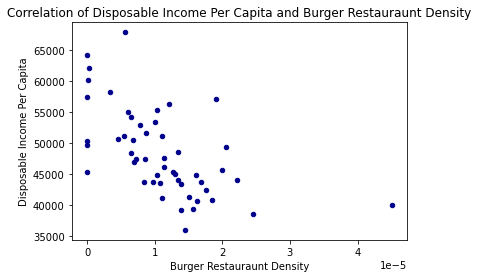

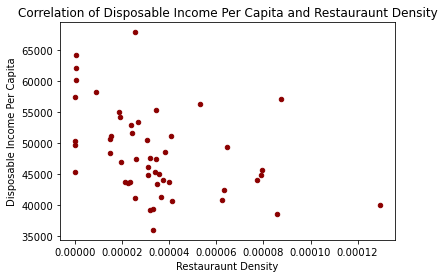

In [25]:
df_main.plot.scatter(x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/', c='DarkBlue')
plt.title('Correlation of Disposable Income Per Capita and Burger Restauraunt Density')
plt.xlabel('Burger Restauraunt Density')
plt.ylabel('Disposable Income Per Capita')

df_main.plot.scatter(x='restaurant_density', y='Per capita disposable personal income (dollars) 2/', c='DarkRed')
plt.title('Correlation of Disposable Income Per Capita and Restauraunt Density')
plt.xlabel('Restauraunt Density')
plt.ylabel('Disposable Income Per Capita')

It is evident that but variables restaurant density and burger restaurant density have a moderate negative correlation to disposable income per capita where burger restaurant density seems to have a slightly stronger correlation. At a baseline level, this means that as the fast food restaurant density increases in a given state, disposable income will decrease. Of course this both relationships arent 1 to 1, but investigating these relationships seems to be worthwhile and understanding the data from an economic stand point can explain many variables as both relationships seem to have a moderately high coorelation; where burger restaurant density higher than restaurant density. 

Text(0, 0.5, 'Count')

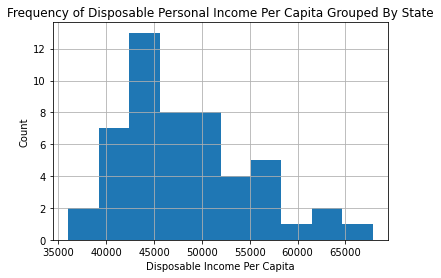

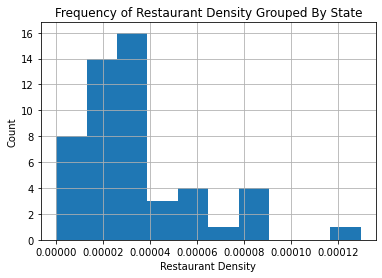

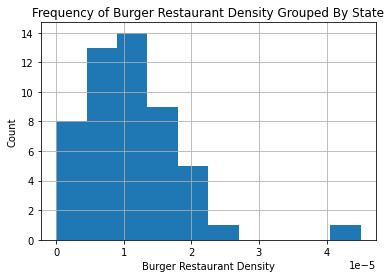

In [26]:
df_main.hist(column='Per capita disposable personal income (dollars) 2/')
plt.title('Frequency of Disposable Personal Income Per Capita Grouped By State')
plt.xlabel('Disposable Income Per Capita')
plt.ylabel('Count')

df_main.hist(column = 'restaurant_density')
plt.title('Frequency of Restaurant Density Grouped By State')
plt.xlabel('Restaurant Density')
plt.ylabel('Count')

df_main.hist(column= 'burger_rest_density')
plt.title('Frequency of Burger Restaurant Density Grouped By State')
plt.xlabel('Burger Restaurant Density')
plt.ylabel('Count')

The first histogram shows the frequency of average disposable income per capita grouped by state. It is evident that the mean is centered at around 45,0000-50,0000 meaning the average income in the united states ranges from $45,000- $50,000
The second histogram sshows the frequency of restaurant density grouped by state. It is evident that the average density of fast food restaurants in the united states ranges from 0.002%-0.004%.
The third histogram sshows the frequency of burger restaurant density grouped by state. It is evident the average density of fast food restaurants that serve burgers in the united states ranges from 0.001%-0.002%.

### 7. Conclusion

After doing some data cleaning, I was able to extracract relevant data to answer my question. In fact, after plotting the scatter plot between restaurant density and personal disposable income per capita, there is evidence of a somewhat strong negative correlation between the two variables. This means that as disposable income per capita increases, the concentration of restaurants in a given area decreases. Because of this relatively strong relationship, it will be interesting to further explore and analyze the data and make some economic intuition out of future conclusions made. For example, because fast foods are known to be inferior goods, this may explain why the concentration of fast food restaurants are lower in high income areas.  Similarly, we can also explore burger restaurant density as it seems to have an even stronger correlation with disposable income per capita.

## 2. The Message: Disposable Income per Capita Determines the Density of Fast Food Restaurants That Sell Burgers in a State.

At the beginning of the paper, I wanted to see if there was a correlation between restaurant density and disposable income per capita. After analyzing the data, it was evident that the data contained categories that included a wide genre of food. Therefore I chose to specifically explore the correlation between the density of restaurants that sell burgers and personal income per capita. After observing the negative correlation between income and bureger restaurant density, this follows economic intuition. Burgers are inferior goods, meaning as income rises less of that good will be purchased. Therefore, in states where income is high, less people will buy fast food, meaning the fast food service sector will contribute less to GDP, meaning less fast food restaurants will open in that area because demand is relativelt lower. 


## 3. Control Group

It is evident that we see a relatively negative correlation between burger restaurant density and disposable income per capita. This means that as disposable income per capita increases in a given state, there will be a smaller density of burger restaurants within that state. In order to further test the accuracy of this relationship, I will introduce a control group represented as 'cafe_density' and present the relationship to disposable income per capita. If my hypothesis holds, because products served at cafe's are not inferior goods, the correlation should be relatively weaker. 
In the code below, I searched under the 'categories' variable in the 'restaurants' dataset and searched for all values corresponding to a category containing the word coffee. I then grouped values by province and stored data in 'cafe'. Once I merged this new table with our old main dataframe, ('df_main') I calculated the coffee density

In [27]:
cafe = restaurants.loc[restaurants.categories.str.lower().str.contains(r'coffee|cafe')]
cafe = cafe.groupby('province').size().reset_index()
cafe.columns = ['Code', 'num_coffee_houses']
df_new = pd.merge(df_main, cafe, on = 'Code', how = 'left' )
df_new['num_coffee_houses'] = df_new.num_coffee_houses.fillna(0)
df_new['cafe_density'] = df_new['num_coffee_houses'] / df_new['Population (persons) 1/']
df_new.head()



,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density,num_coffee_houses,cafe_density
0,AK,41899.7,57115.0,733603.0,64.0,14.0,0.000087,0.000019,5.0,0.000007
1,AL,196131.2,39962.0,4907965.0,635.0,221.0,0.000129,0.000045,38.0,0.000008
2,AR,122878.1,40675.0,3020985.0,124.0,49.0,0.000041,0.000016,5.0,0.000002
3,AZ,300174.7,41166.0,7291843.0,186.0,81.0,0.000026,0.000011,13.0,0.000002
4,CA,2172607.7,55090.0,39437610.0,727.0,237.0,0.000018,0.000006,78.0,0.000002


## 4. Visualization

Because we want to observe the strength correlation between two variables, a scatter plot is most sensible. Before I plot correlation between variables 'burger_desnity' and 'cafe_desnity' and then compare the correlation with income per capita, I will import a package that will make plots look more visually pleasing .

In [28]:
import seaborn as sns


Text(0, 0.5, 'Disposable Income Per Capita')

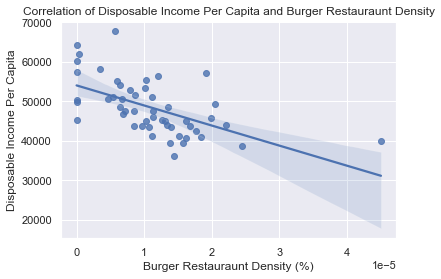

In [29]:
sns.set(font_scale = 1)
sns.regplot(data=df_new, x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Burger Restauraunt Density')
plt.xlabel('Burger Restauraunt Density (%)')
plt.ylabel('Disposable Income Per Capita')

It is evident there is a relatively moderate negative relationship between burger resturaunt density and personal income per capita as we observed previously.

Text(0, 0.5, 'Disposable Income Per Capita')

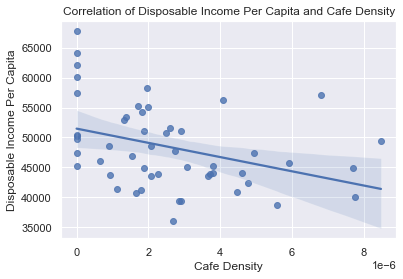

In [30]:
sns.set(font_scale = 1)
sns.regplot(data=df_new, x='cafe_density', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Cafe Density')
plt.xlabel('Cafe Density')
plt.ylabel('Disposable Income Per Capita')

When analyzing the relationship between cafe density and disposable income per capita, the relationship is very weak. Intuitively, this makes sense. Because coffee is not an inferior good nor a luxury good, it has a very week relationship with disposable income per capita. The estimation of the strength of this relationship is represented by the line. It is evident that the line is almost horizontal, meaning the slope of this linear approzimation is close to zero, ultimately, representing the very weak relationship between both variables 

## 5. Mapping

In [31]:
import geopandas as gpd

In the code below, I am importing a shape file consisting of 2016 US census data grouped by state. In order to merge this file with my main dataset ('df_new'), I merged on state. Some data cleaning to not: In order to merge I had to rename the column corresponding to state code in df_new to the same name as what the column name is called in the shape file. 

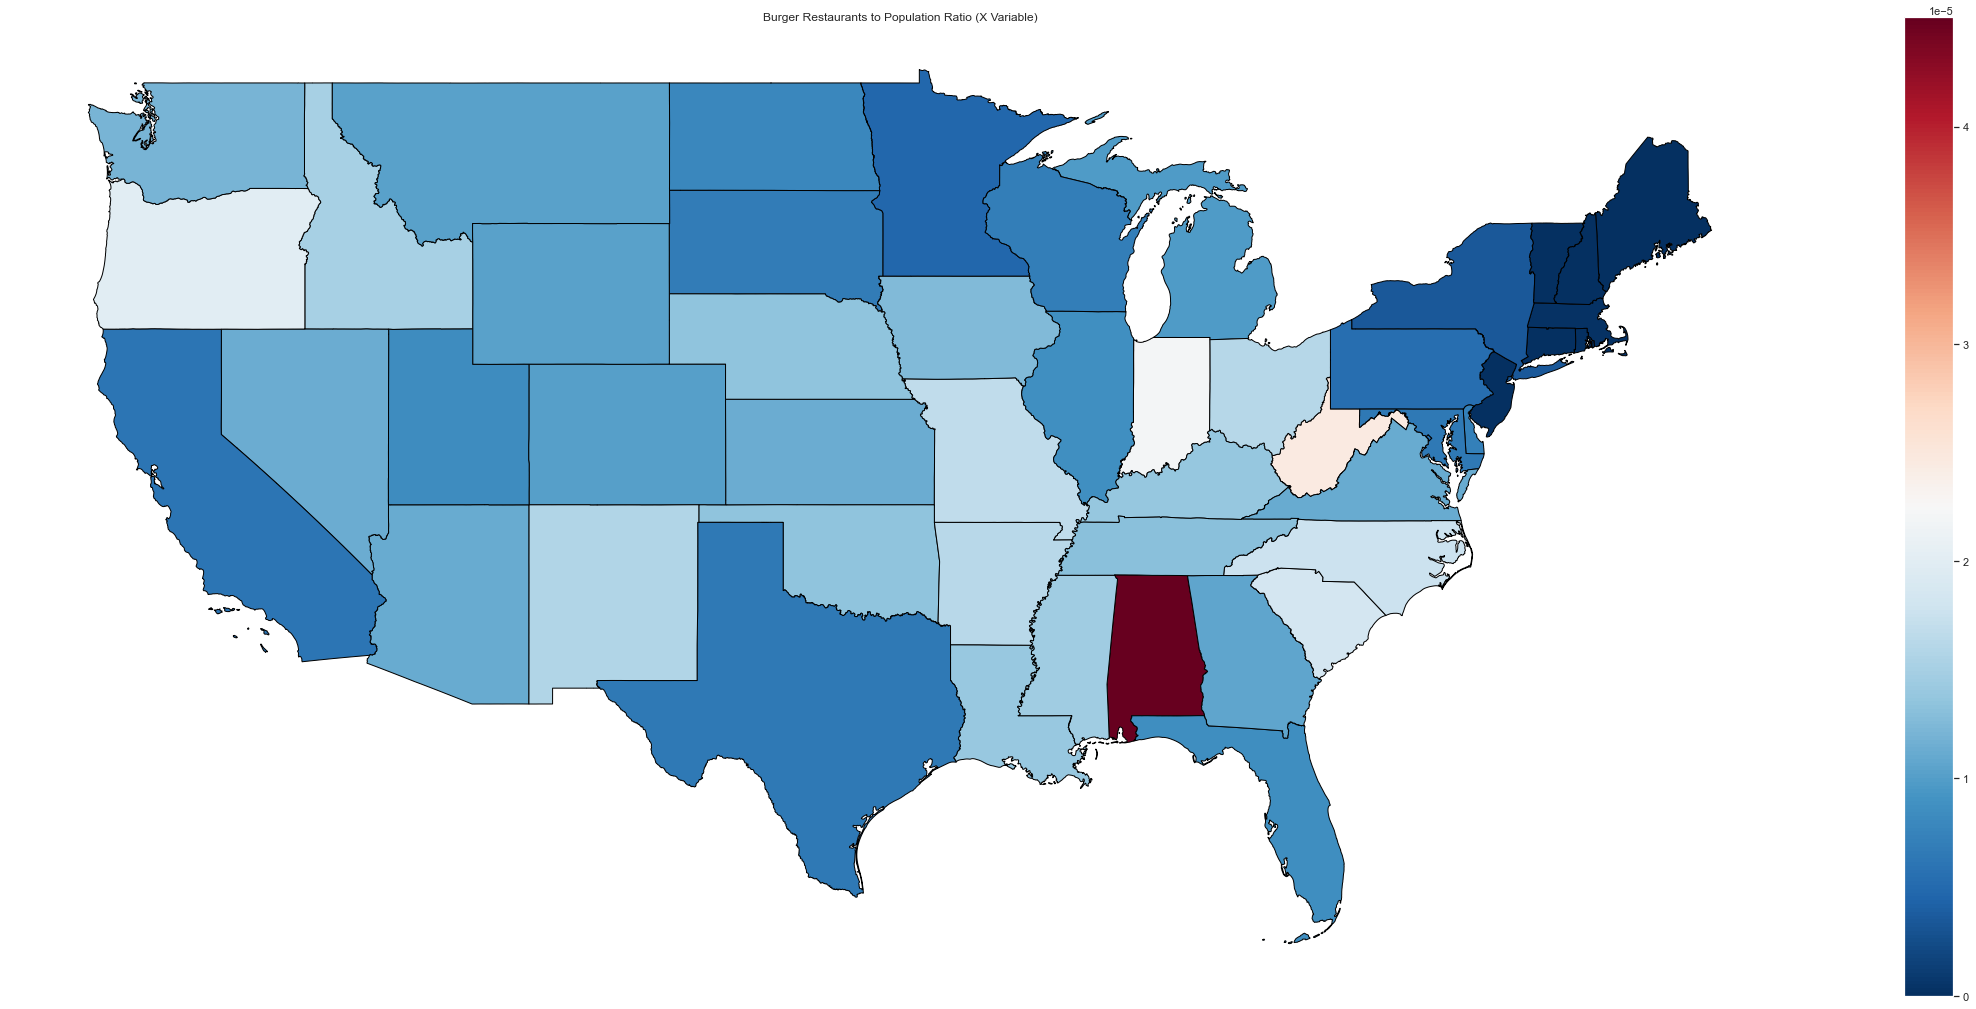

In [32]:
matplotlib.rcParams.update({'font.size': 22})

states = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
states = states.merge(df_new.rename({"Code":"STUSPS"},axis=1),on="STUSPS")

fig, gax = plt.subplots(figsize=(40, 18))
states.query("STUSPS not in ['AK','GU','VI','MP','HI','PR','AS']").plot(ax=gax, 
                                                                        edgecolor="black", 
                                                                       column="burger_rest_density",
                                                                       cmap="RdBu_r",
                                                                       legend=True)
plt.title("Burger Restaurants to Population Ratio (X Variable)")
plt.axis('off')
plt.show()

This is the map of the United States, showcasing the burger restaurant density in each state. This is represented by colour as the range plot shows the degree of burger restaurant density by colour. When analyzing the plot, it is evident that their is high burger resataurant density in Alabama meaning their are many burger restaurants within a closer radius in this state. Intuitively, Alabama has a relatively higher demand in fast food than other states as fast food chains are concentrated throughout the state. 

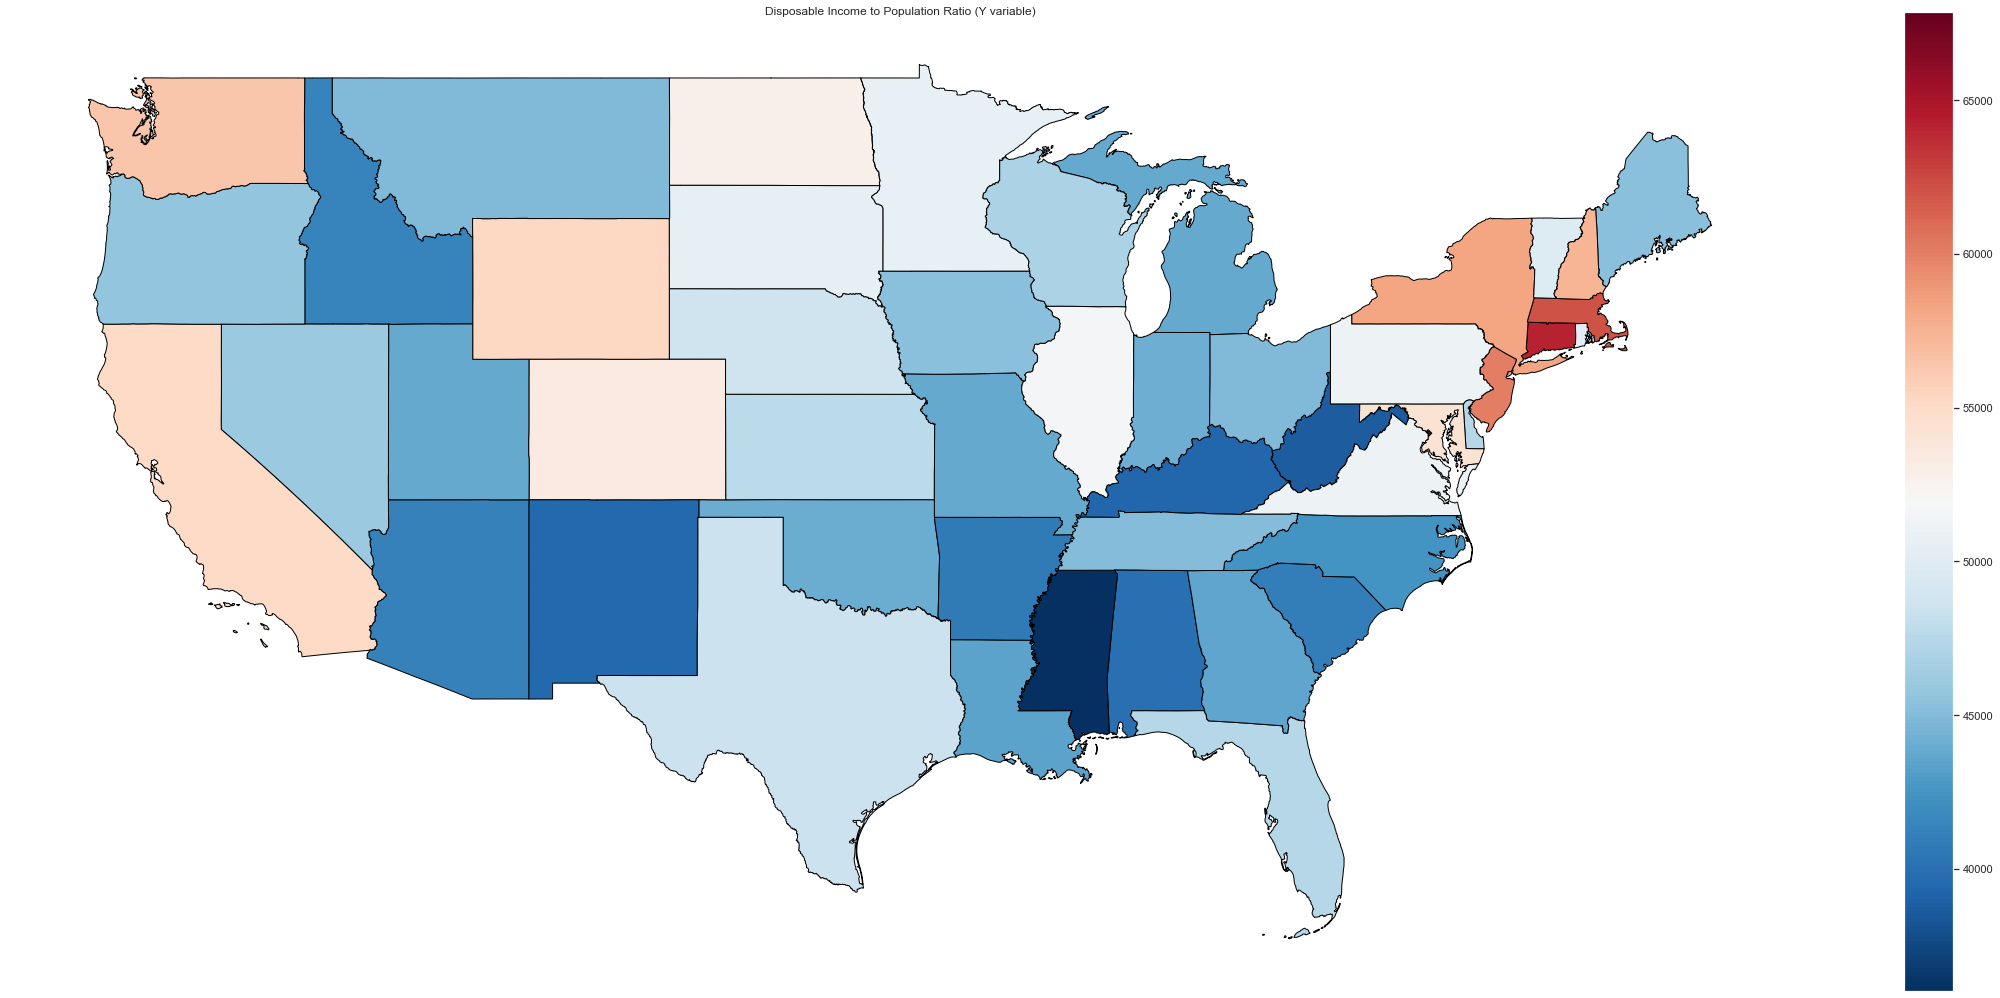

In [33]:
fig, gax = plt.subplots(figsize=(40, 18))
states.query("STUSPS not in ['AK','GU','VI','MP','HI','PR','AS']").plot(ax=gax, 
                                                                        edgecolor="black", 
                                                                       column="Per capita disposable personal income (dollars) 2/",
                                                                       cmap="RdBu_r",
                                                                       legend=True)
plt.title("Disposable Income to Population Ratio (Y variable)")
plt.axis('off')
plt.show()


This is a map of the United Staes showcasing disposable income per capita in each state. This is represented by colour as the range plot shows the degree of income per capita by colour. In this map, there are more outliers. For example, in the north east region, states such as New York, Rhode Island and Conneticut all have relatively high income per capita. This corresponds to very low burger restaurant density in the first map as the colour for those three states are very dark blue, representing low burger restaurant density. Another example of outliers are Washington, Califoirnia, and Wyoming, all having relatively high income per capita. This also corresponds to the first map as those states are represented as relatively darker colours, meaning relatively lower burger restaurant density.

These are just a few examples, however, in geneneral, according to both maps, it is evident that a state with high income per capita represented as a brighter, will have lower burger restaurant density in the other map represented as a darker colour. Therefore my message still holds according to the resulting data analyzed from both maps.

## 6. Conclusion

This project has allowed me to further analyze my question, formulate a hypothesis and a general them this porject will be exploring, and kickstarting the analysis on my formulated hypothesis. Based off the data presented by plots and the maps, my hypothesis holds as their seems to be relatively strong negative correlation between burger restaurant density and disposable income per capita. By making plots more visually pleasing, it was easier to observe this correlation in more depth. Also, adding a control group such as cafe density, shows the vast difference between the two independant variables. An economic intuition lines up perfectly with the data. Because goods sold at cafe's are neither luxury goods nor inferior goods, their was a very weak, almost non-existent correlation with disposable income per capita. 
When analyzing the data further when ampping income per capita and burger density, the negative correlation seemed to be prevalent. In general, this project allowed me to use my skills to plot, visualize and anayze data; regardless of the method i used to vidualize data, I am trying to proove the question of this project: Does the concentration of fast foods in a given state determine income per capita?

# Project 3

## 1. Updated Project 2

### 0. Feedback  
- Message is not present or is not relevant/meaningful
- Message plot illustrates the main message well, is well displayed, and well explained
- The fine tunings are done to a satisfactory level
- Two to three relevant maps of important variables are created
- No major improvements needed. Clear plot, important variables, good choice of color/contrast
- Inro and conclusion are rewritten in economic terms with no major issues

### 1. Message: Disposable Income per Capita Determines the Density of Fast Food Restaurants That Sell Burgers in a State.

At the beginning of the paper, I wanted to see if there was a correlation between restaurant density and disposable income per capita. After analyzing the data, it was evident that the data contained categories that included a wide genre of food. Therefore I chose to specifically explore the correlation between the density of restaurants that sell burgers and personal income per capita. After observing the negative correlation between income and burger restaurant density,I noticed this trend follows economic intuition. Burgers are inferior goods, meaning as income rises less of that good will be purchased. Therefore, in states where income is high, less people will buy fast food, meaning the fast food service sector will contribute less to GDP, meaning less fast food restaurants will open in that area because demand is relativelt lower. In general, the data shows that the density of fast food restaurants that sell burgers is a key determinant of disposable income per capita.

### 2. Control group
It is evident that we see a relatively negative correlation between burger restaurant density and disposable income per capita. This means that as disposable income per capita increases in a given state, there will be a smaller density of burger restaurants within that state. In order to further test the accuracy of this relationship, I will introduce a control group represented as 'cafe_density' and present the relationship to disposable income per capita. If my hypothesis holds, because products served at cafe's are not inferior goods, the correlation should be relatively weaker. 
In the code below, I searched under the 'categories' variable in the 'restaurants' dataset and searched for all values corresponding to a category containing the word coffee. I then grouped values by province and stored data in 'cafe'. Once I merged this new table with our old main dataframe, ('df_main') I calculated the coffee density

In [34]:
cafe = restaurants.loc[restaurants.categories.str.lower().str.contains(r'coffee|cafe')]
cafe = cafe.groupby('province').size().reset_index()
cafe.columns = ['Code', 'num_coffee_houses']
df_new = pd.merge(df_main, cafe, on = 'Code', how = 'left')
df_new['num_coffee_houses'] = df_new.num_coffee_houses.fillna(0)
df_new['cafe_density'] = (df_new['num_coffee_houses'] / df_new['Population (persons) 1/'])*100
df_new.head()

,Code,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density,num_coffee_houses,cafe_density
0,AK,41899.7,57115.0,733603.0,64.0,14.0,0.000087,0.000019,5.0,0.000682
1,AL,196131.2,39962.0,4907965.0,635.0,221.0,0.000129,0.000045,38.0,0.000774
2,AR,122878.1,40675.0,3020985.0,124.0,49.0,0.000041,0.000016,5.0,0.000166
3,AZ,300174.7,41166.0,7291843.0,186.0,81.0,0.000026,0.000011,13.0,0.000178
4,CA,2172607.7,55090.0,39437610.0,727.0,237.0,0.000018,0.000006,78.0,0.000198


### 3. Visualization
Because we want to observe the strength correlation between two variables, a scatter plot is most sensible. Before I plot correlation between variables 'burger_desnity' and 'cafe_desnity' and then compare the correlation with income per capita, I will import a package that will make plots look more visually pleasing .

In [35]:
import seaborn as sns

Text(0, 0.5, 'Disposable Income Per Capita')

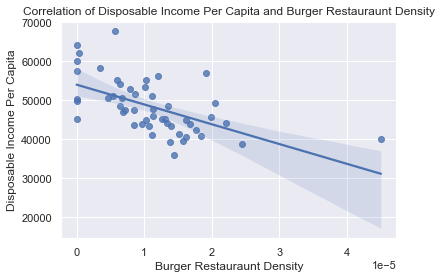

In [36]:
sns.set(font_scale = 1)
sns.regplot(data=df_new, x='burger_rest_density', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Burger Restauraunt Density')
plt.xlabel('Burger Restauraunt Density')
plt.ylabel('Disposable Income Per Capita')

It is evident there is a relatively moderate negative relationship between burger resturaunt density and personal income per capita as we observed previously.

Text(0, 0.5, 'Disposable Income Per Capita')

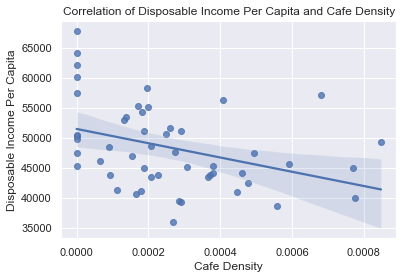

In [37]:
sns.set(font_scale = 1)
sns.regplot(data=df_new, x='cafe_density', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Cafe Density')
plt.xlabel('Cafe Density')
plt.ylabel('Disposable Income Per Capita')

When analyzing the relationship between cafe density and disposable income per capita, the relationship is very weak. Intuitively, this makes sense. Because coffee is not an inferior good nor a luxury good, it has a very week relationship with disposable income per capita. The estimation of the strength of this relationship is represented by the line. It is evident that the line is almost horizontal, meaning the slope of this linear approzimation is close to zero, ultimately, representing the very weak relationship between both variables 

### 4. Mapping

In [38]:
import geopandas as gpd

In the code below, I am importing a shape file consisting of 2016 US census data grouped by state. In order to merge this file with my main dataset ('df_new'), I merged on state. Some data cleaning to note: In order to merge I had to rename the column corresponding to state code in df_new to the same name as what the column name is called in the shape file. 

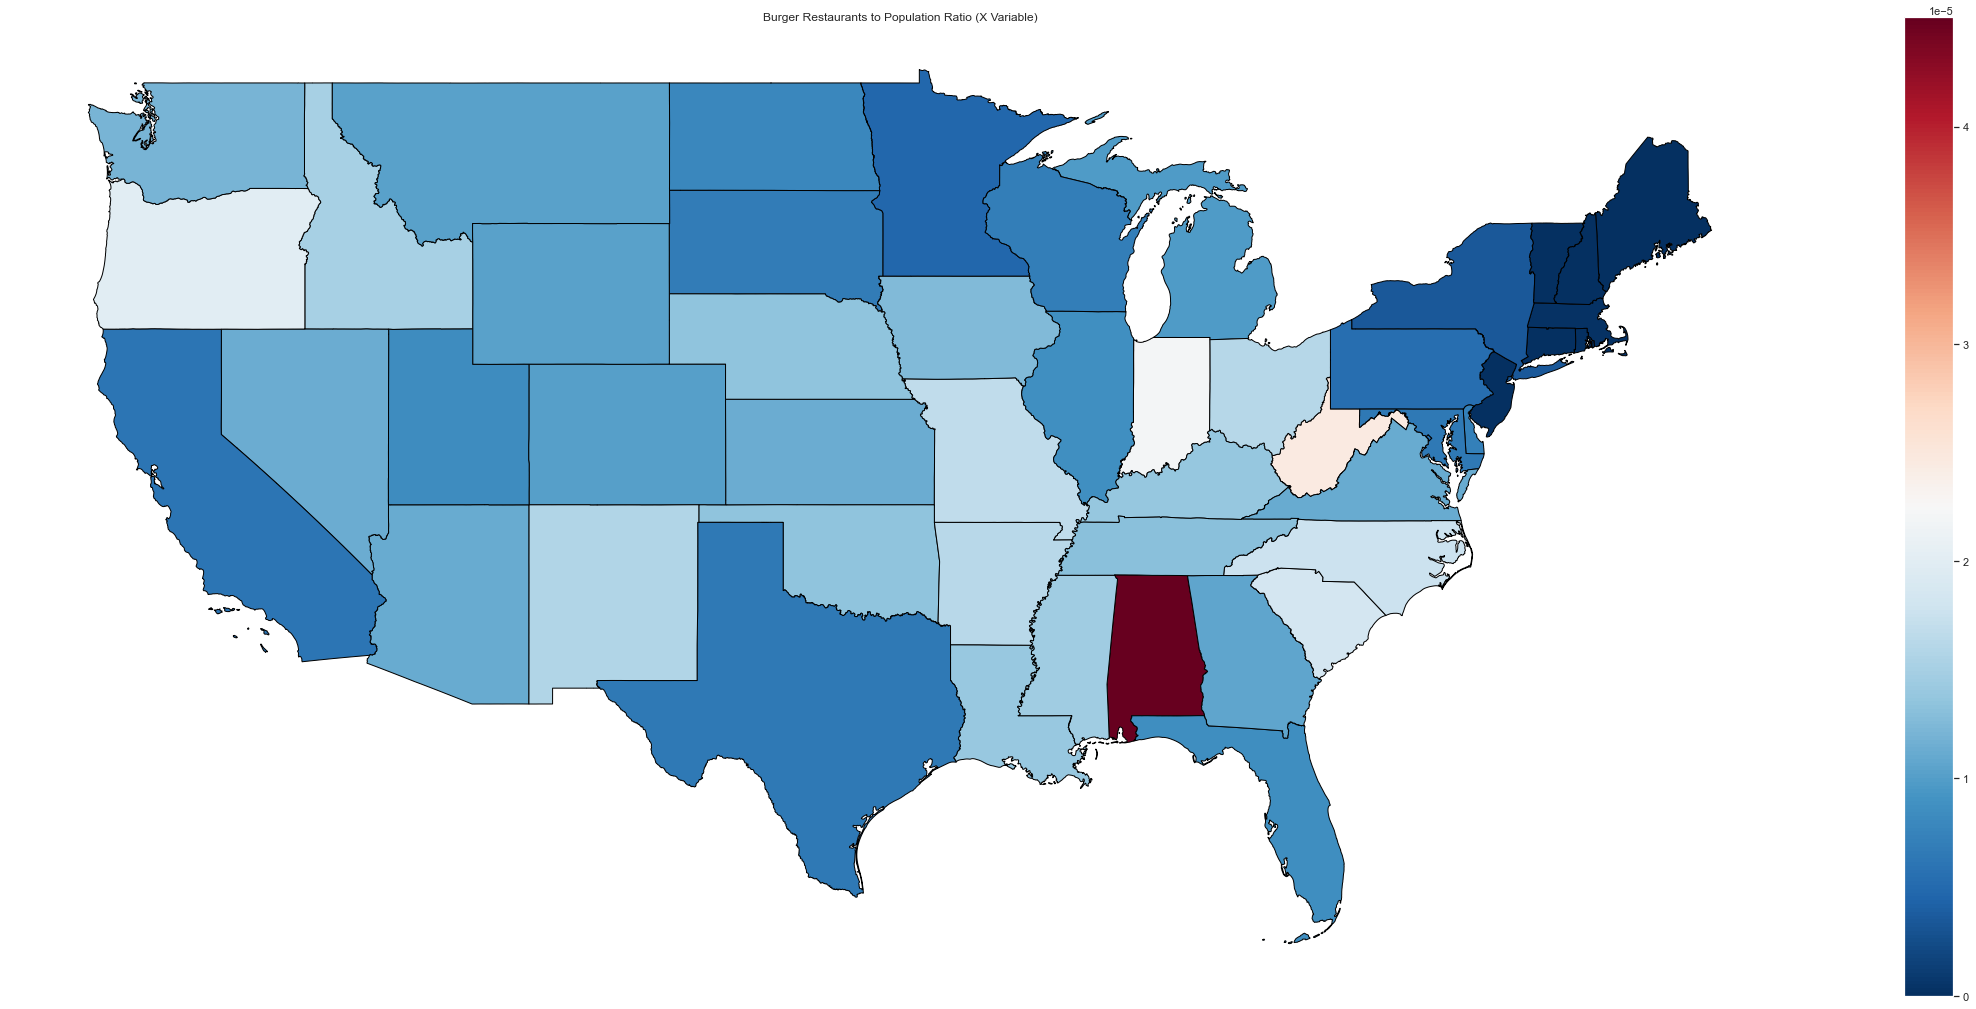

In [76]:
matplotlib.rcParams.update({'font.size': 22})

states = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
states = states.merge(df_new.rename({"Code":"STUSPS"},axis=1),on="STUSPS")

fig, gax = plt.subplots(figsize=(40, 18))
states.query("STUSPS not in ['AK','GU','VI','MP','HI','PR','AS']").plot(ax=gax, 
                                                                        edgecolor="black", 
                                                                       column="burger_rest_density",
                                                                       cmap="RdBu_r",
                                                                       legend=True)
plt.title("Burger Restaurants to Population Ratio (X Variable)")
plt.axis('off') 
plt.show()

This is the map of the United States, showcasing the burger restaurant density in each state. This is represented by colour as the range plot shows the degree of burger restaurant density by colour. When analyzing the plot, it is evident that their is high burger resataurant density in Alabama meaning their are many burger restaurants within a closer radius in this state. Intuitively, Alabama has a relatively higher demand in fast food than other states as fast food chains are concentrated throughout the state. 

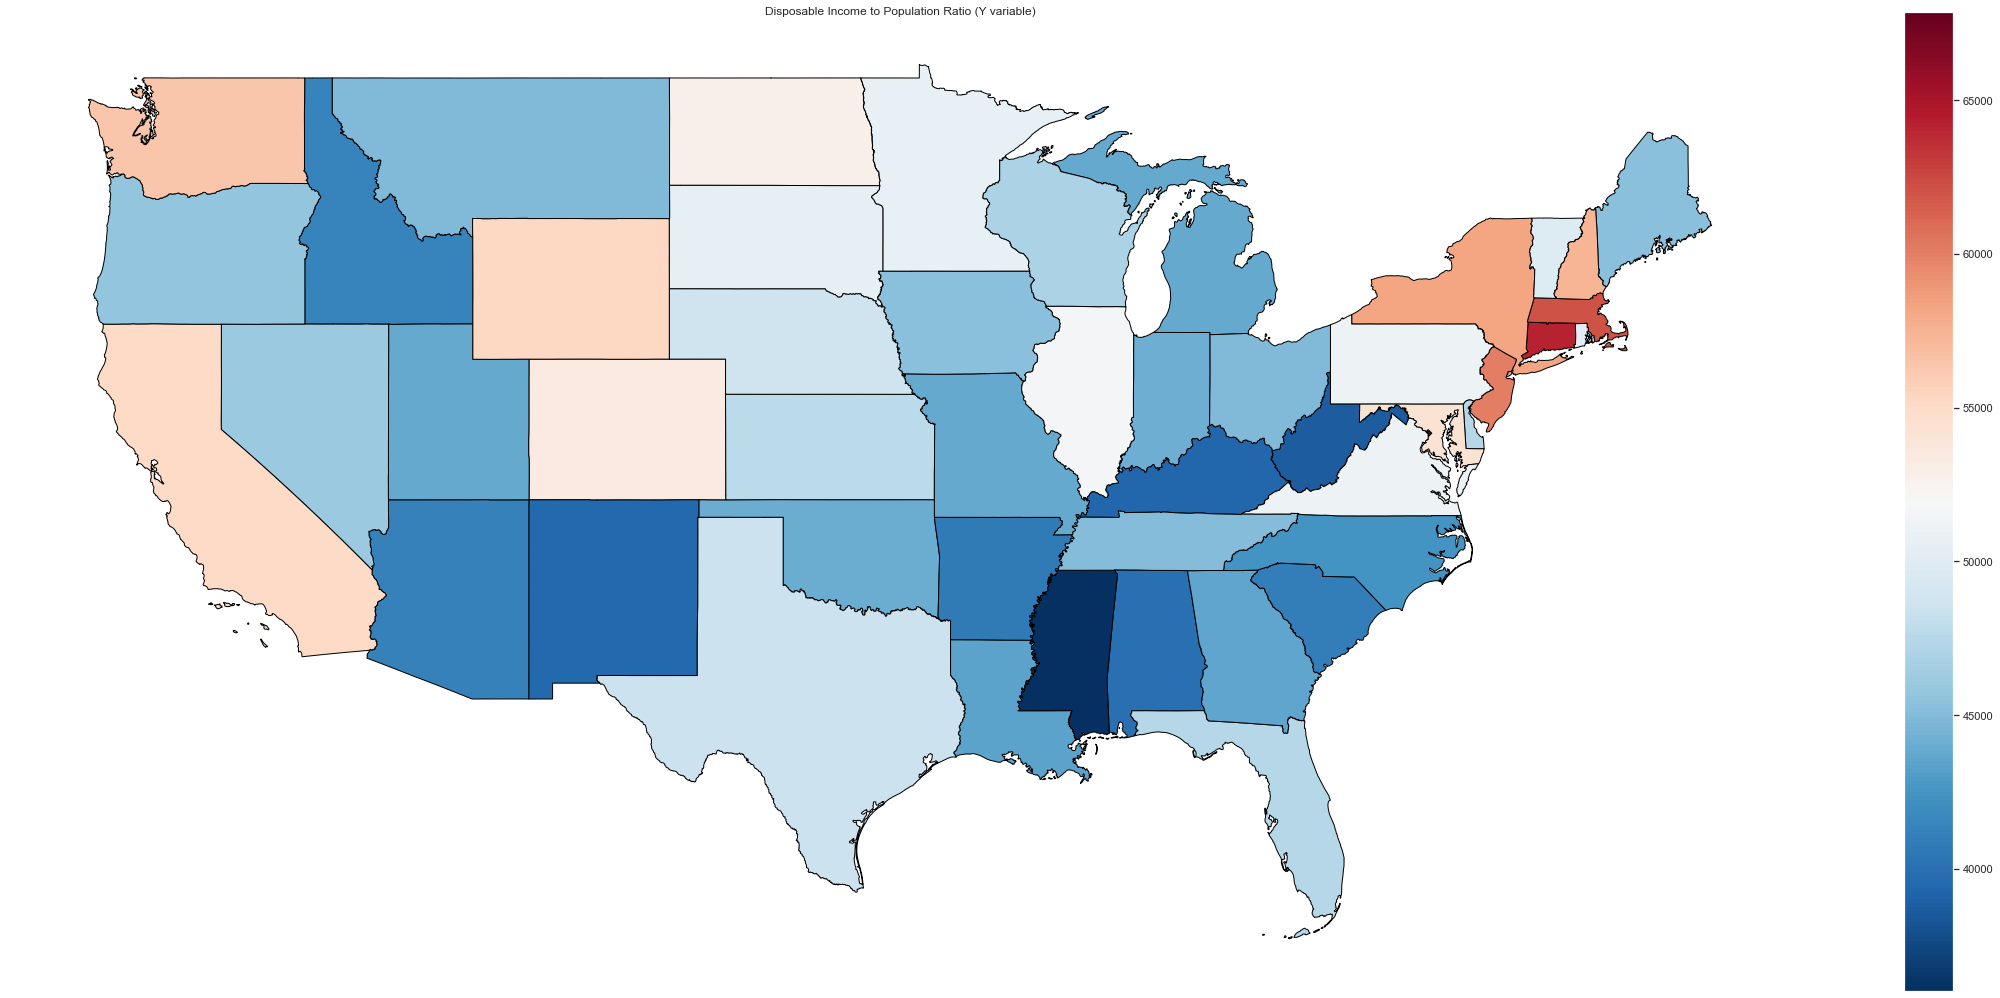

In [40]:
fig, gax = plt.subplots(figsize=(40, 18))
states.query("STUSPS not in ['AK','GU','VI','MP','HI','PR','AS']").plot(ax=gax, 
                                                                        edgecolor="black", 
                                                                       column="Per capita disposable personal income (dollars) 2/",
                                                                       cmap="RdBu_r",
                                                                       legend=True)
plt.title("Disposable Income to Population Ratio (Y variable)")
plt.axis('off')
plt.show()

This is a map of the United Staes showcasing disposable income per capita in each state. This is represented by colour as the range plot shows the degree of income per capita by colour. In this map, there are more outliers. For example, in the north east region, states such as New York, Rhode Island and Conneticut all have relatively high income per capita. This corresponds to very low burger restaurant density in the first map as the colour for those three states are very dark blue, representing low burger restaurant density. Another example of outliers are Washington, Califoirnia, and Wyoming, all having relatively high income per capita. This also corresponds to the first map as those states are represented as relatively darker colours, meaning relatively lower burger restaurant density.

These are just a few examples, however, in geneneral, according to both maps, it is evident that a state with high income per capita represented as a brighter, will have lower burger restaurant density in the other map represented as a darker colour. Therefore my message still holds according to the resulting data analyzed from both maps.

### 5. Conclusion
This project has allowed me to further analyze my question, formulate a hypothesis and a general them this porject will be exploring, and kickstarting the analysis on my formulated hypothesis. Based off the data presented by plots and the maps, my hypothesis holds as their seems to be relatively strong negative correlation between burger restaurant density and disposable income per capita. By making plots more visually pleasing, it was easier to observe this correlation in more depth. Also, adding a control group such as cafe density, shows the vast difference between the two independant variables. An economic intuition lines up perfectly with the data. Because goods sold at cafe's are neither luxury goods nor inferior goods, their was a very weak, almost non-existent correlation with disposable income per capita. 
When analyzing the data further when ampping income per capita and burger density, the negative correlation seemed to be prevalent. In general, this project allowed me to use my skills to plot, visualize and anayze data; regardless of the method i used to vidualize data, I am trying to proove the question of this project: Does the concentration of fast foods in a given state determine income per capita?

## 2. External Data Analysis
Although previous data and visualization models have shown that there is a moderately strong negative correlation between burger restaurant density and disposable income per capita in a given state, there is just one independant variable present. In order to explore in more depth this relationship, other factors must be considered. I scraped from the Bureau of Economic Analysis using their provided API(https://apps.bea.gov/api/_pdf/bea_web_service_api_user_guide.pdf). The API included three datasets of interest. Note that each dataset is grouped by state. (1) represents the amount of takeouts per capita in dollars in a given year, (2) represents the amount of non durable consumption in dollars in a given year, and (3) represents durable consumption in a given year. Merginf these three datasets to my original dataset will enhance my research as comparing these 3 dependant variables to burger restaurant density is already backed up by economic intuition and it is viable to analyze if this matches the data. For example, takeouts per capita and burger restaurant density in a given state should have a strong positive correlation with eachother as both are associated with inferioir goods. Non durable consumption represents the consumption of goods thatt have immediate use such as food, gasoline, shoes, etc. It will be interesting to see the correlation between non durable consumption and burger restaurant density as non durable consumption consists of inferior, normal, and luxurious goods; however, non durable consumption has a very low correlation with investment so this opens another door to economic analysis. On the other hand, durable consumption are goods that have a yearly long life expectancy such as cars, electronics, home furnishing, etc. Durable consumption usually has a high correlation to residential investment as home furnishing increases the value of the home; thus increasing total investment when sold. 

## 3. Challenges
Thankfully, because I am only using 2019 data, the program does not have to be reun overtime to generate the data. Also, API-based scraping is deemed viable as the Bureau of Economic Analysis provides their API on their website as well as a PDF containing it's guidlines and how to use their API. Because the three datasets of interest are all seperate, I must merge the three datasets before merging the product to my originaly dataset (df_new). Also, I will have to convert the text file of each of these datasets to a json file (dictionary). Once converted, I finally have to convert each dataset into a pandas dataframe; then I can finally merge the three datasets.

## 4. API-based Scraping: BEA

I first have to import the packages necessery for using BEA's API. The 'requests' package allows users to make human friendly requests to the website's database. importing the 'json package' is necessery because if the file is not in json file we must convert it, which eventually allows for final conversions to panda dataframes.

In [41]:
import requests 
import json

Based on API guidlines, I must register for a user token in order to use BEA's API. In order for BEA to know which data I want to scrape, I must specify the table code and the year. I saved this information under three variables for future use; more specifically, when retrieving the data query.

In [42]:
myapitoken = '9E7F1056-BF75-446B-990F-8F6C258CE49E'
table_name = 'SAPCE2'
year = '2019'

Based on API guidlines, numbers 9, 8, 3 represent takeouts per capita, non durable consumption per capita, and durable consumption per capita.

In [43]:
lines = ['9', '8', '3']

Insetead of converting each dataset from a textfile to json format and then finally converting to a pandas dataframe, I can run a for loops in order for more efficient and cleaner code. Noe that saving variables 'myapitoken', 'table_name', and 'year' are used for the url link to access the desired datasets using BEA's provided url. Once the text file is converted into json format, it is important to note that json is formatted as a dictionary. So wehn converting json to a pandas dataframe, the key represents the given line (either 9, 8, 3) and the value represents it's corresponding dataset. In order to find the value, I had to explore the text file by analyzing the data variable. 

In [44]:
results = {}
for line in lines:
    dataquery = f'https://apps.bea.gov/api/data/?UserID={myapitoken}&method=GetData&datasetname=Regional&TableName={table_name}&LineCode={line}&Year={year}&GeoFips=STATE&ResultFormat=json'
    r = requests.get(dataquery)
    rawtext = r.content.decode('utf-8')
    data = json.loads(rawtext)
    results[line] = pd.DataFrame(data['BEAAPI']['Results']['Data'])

In order for convenience purposes, I changed the names of each newly created pandas dataframe. 

In [45]:
df1 = results['9']
df2 = results['8']
df3 = results['3']

df1 represents takeouts per capita in 2019 represented in dollars grouped by state.

In [46]:
df1.head()

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,SAPCE2-9,00000,United States,2019,Dollars,0,"3,140"
1,SAPCE2-9,01000,Alabama,2019,Dollars,0,"2,822"
2,SAPCE2-9,02000,Alaska,2019,Dollars,0,"3,787"
3,SAPCE2-9,04000,Arizona,2019,Dollars,0,"2,851"
4,SAPCE2-9,05000,Arkansas,2019,Dollars,0,"2,559"


df2 represents non durable consumption per capita in 2019 represented in dollars grouped by state.

In [47]:
df2.head()

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,SAPCE2-8,00000,United States,2019,Dollars,0,"9,032"
1,SAPCE2-8,01000,Alabama,2019,Dollars,0,"8,754"
2,SAPCE2-8,02000,Alaska,2019,Dollars,0,"8,453"
3,SAPCE2-8,04000,Arizona,2019,Dollars,0,"8,185"
4,SAPCE2-8,05000,Arkansas,2019,Dollars,0,"7,987"


df3 represents durable consumption per capita in 2019 represented in dollars grouped by state.

In [48]:
df3.head()

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,SAPCE2-3,00000,United States,2019,Dollars,0,"4,609"
1,SAPCE2-3,01000,Alabama,2019,Dollars,0,"3,940"
2,SAPCE2-3,02000,Alaska,2019,Dollars,0,"5,371"
3,SAPCE2-3,04000,Arizona,2019,Dollars,0,"4,513"
4,SAPCE2-3,05000,Arkansas,2019,Dollars,0,"3,698"


Notice in all three datasets, the variables of interest all have the same name 'DataValue'. In order to avoid confusion when analyzing the data, I changed each datasets column name 'DataValue' to their corresponding variables.

In [49]:
df1 = df1.rename(columns = {'DataValue': 'takeouts_percapita'})
df2 = df2.rename(columns = {'DataValue': 'nondurable_consumption_percapita'})
df3 = df3.rename(columns = {'DataValue': 'durable_consumption_percapita'})

Now I can finally merge the three datasets together. Also note how in each sperate dataset, there were column names of non-interest. For example I don't have to include 'Code', 'GeoFips', 'TimePeriod', 'CL_UNIT', and 'Unit_MULT'. Once all three datasets are merged. I must change the column name 'GeoName' to 'Code' as I will merge on Code when merging the newly merged dataset with my original dataset. Before I can do this, I must use the previously imported 'State' dataset and merge it with the merged dataset in order to contain state abbreviations. Now I can finally merge this dataset with my original dataset on 'Code'.

In [50]:
df = pd.merge(df1[['GeoName', 'takeouts_percapita']], df2[['GeoName', 'nondurable_consumption_percapita']], on='GeoName')
df = pd.merge(df, df3[['GeoName', 'durable_consumption_percapita']], on = 'GeoName')
df = df.rename(columns = {'GeoName': 'State'})
df = pd.merge(state, df, on = 'State')
df = df.drop(['State', 'Abbrev'], axis = 1)
df = pd.merge(df, df_new, on = 'Code')

This is the final dataset, containing new variables 'takeouts_percapita', 'nondurable_consumption_percapita', and 'durable_consumption_percapita'. 

## 5. Visualization

Before I analyze trends witht he three added variables. I noticed that the type of each of the three variables were not integers or floats. Therefore, I had to convert the object type for each variable to an integer. Before I could do this, I had to remove all the commas included in each value that were present in all three variables.

In [51]:
df['takeouts_percapita']=df.takeouts_percapita.str.replace(",","").astype(float)
df['nondurable_consumption_percapita']=df.nondurable_consumption_percapita.str.replace(",","").astype(float)
df['durable_consumption_percapita']=df.durable_consumption_percapita.str.replace(",","").astype(float)

In [52]:
df.head()

,Code,takeouts_percapita,nondurable_consumption_percapita,durable_consumption_percapita,Disposable personal income (millions of dollars),Per capita disposable personal income (dollars) 2/,Population (persons) 1/,num_restaurants,num_burger_restaurants,restaurant_density,burger_rest_density,num_coffee_houses,cafe_density
0,AL,2822.0,8754.0,3940.0,196131.2,39962.0,4907965.0,635.0,221.0,0.000129,0.000045,38.0,0.000774
1,AK,3787.0,8453.0,5371.0,41899.7,57115.0,733603.0,64.0,14.0,0.000087,0.000019,5.0,0.000682
2,AZ,2851.0,8185.0,4513.0,300174.7,41166.0,7291843.0,186.0,81.0,0.000026,0.000011,13.0,0.000178
3,AR,2559.0,7987.0,3698.0,122878.1,40675.0,3020985.0,124.0,49.0,0.000041,0.000016,5.0,0.000166
4,CA,3240.0,8953.0,4537.0,2172607.7,55090.0,39437610.0,727.0,237.0,0.000018,0.000006,78.0,0.000198


Now it is evident the commas are removed in values of each of the three added variables and the type of them are integers. I can now visualize the correlation of these variables to disposable income per capita.

Text(0, 0.5, 'Disposable Income Per Capita')

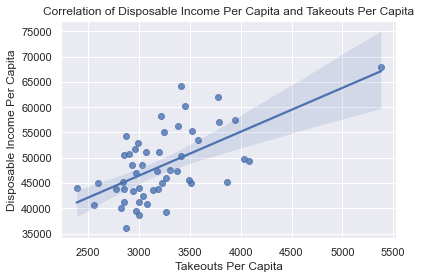

In [53]:
sns.set(font_scale = 1)
sns.regplot(data=df, x='takeouts_percapita', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Takeouts Per Capita')
plt.xlabel('Takeouts Per Capita')
plt.ylabel('Disposable Income Per Capita')

There appears to be a moderate positive correlation between disposable income per capita and takeouts per capita. Technically, this means that as average disposable income per capita increases in a given state, then the average takeouts per capita will also increase. This contradicts economic intuition proposed earlier, as fast food is an inferior good. However, takeouts could range from fast food to expensive food. This may explain the lack of strength in this correlation as takeouts per capita is a very broad category when using it as a predictor for disposable income per capita. 

Text(0, 0.5, 'Disposable Income Per Capita')

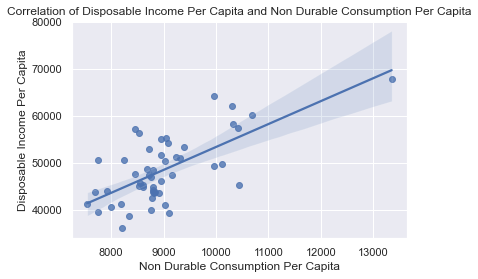

In [54]:
sns.set(font_scale = 1)
sns.regplot(data=df, x='nondurable_consumption_percapita', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Non Durable Consumption Per Capita')
plt.xlabel('Non Durable Consumption Per Capita')
plt.ylabel('Disposable Income Per Capita')

There appears to be a weak to moderate positive correlation between disposable income per capita and non durable consumption per capita. This means that as avergae disposable income per capita increases in a given state, then the average consumption of goods that are non durable will also increase. non durable consumption can range from goods that are inferior to luxurious; Also an important consideration is many goods that are basic necessetities such as tooth brushes, cleaning supplies, food fall under this category. Therefore it makes sense that the more a household makes, the more they will consume in such necesseties. The correlation may not be strong due to the permanent income hypothesis; where households tend to smooth their consumption over time based on their marginal propensity to consume. This means hosuehold may not consume as much as they can. and instead will save a portion of their income in order to smooth consumption.

Text(0, 0.5, 'Disposable Income Per Capita')

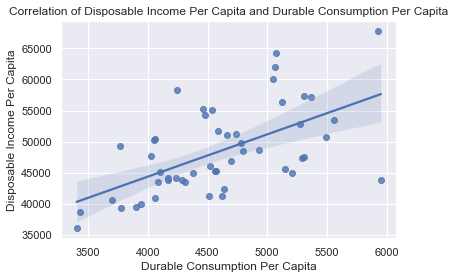

In [55]:
sns.set(font_scale = 1)
sns.regplot(data=df, x='durable_consumption_percapita', y='Per capita disposable personal income (dollars) 2/')
plt.title('Correlation of Disposable Income Per Capita and Durable Consumption Per Capita')
plt.xlabel('Durable Consumption Per Capita')
plt.ylabel('Disposable Income Per Capita')

There appears to be a moderate positive correlation between disposable income per capita and durable consumption per capita. Theoretically, This means that as average disposable income per capita increases in a given state, then the average consumption of goods that are durable will increases. Durable consumption are goods that consumed that last for a longer period of time. Many appreciating assets fall under this category with the exception of vehicle purchases. It would seem to make more sense if there was a stronger correlation than non durable consumption as many durable goods tend to cost more. However, due to the PIH and depending on the households marginal propensity to consume, it may explain the strength of this correlation as many households tend to reinvest savings. 

Text(0, 0.5, 'Count')

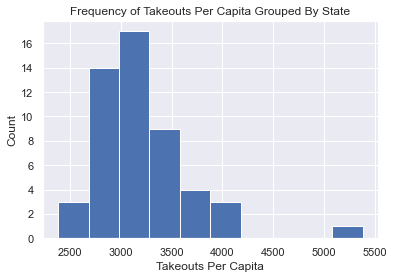

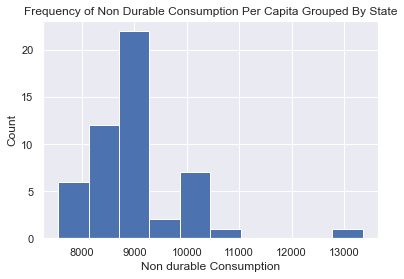

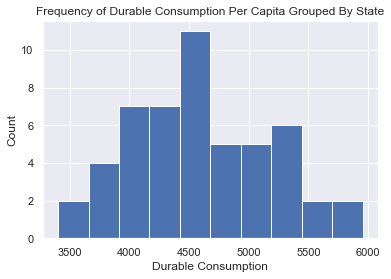

In [56]:
df.hist(column='takeouts_percapita')
plt.title('Frequency of Takeouts Per Capita Grouped By State')
plt.xlabel('Takeouts Per Capita')
plt.ylabel('Count')

df.hist(column = 'nondurable_consumption_percapita')
plt.title('Frequency of Non Durable Consumption Per Capita Grouped By State')
plt.xlabel('Non durable Consumption')
plt.ylabel('Count')

df.hist(column= 'durable_consumption_percapita')
plt.title('Frequency of Durable Consumption Per Capita Grouped By State')
plt.xlabel('Durable Consumption')
plt.ylabel('Count')

It is evident from these three histograms that they are all normally distributed. This means that data near the mean are more likely to occurr. Firstly, takeouts per capita has a mean at approximately 3000 meaning the average amount spent on takeouts of a given household in a given state is around $3000. Nondurable consumption appears to have a mean of 8750 meaning the average amount spent on non durable goods of a given household in a given state is around $8750. Durable consumption appears to have a mean of $4500 meaning the average amount spent on durable goods of a given householf in a given state is around $4500. It is evident that between three variable, the most money of a household's income is spent on non durable goods. Although durable goods tend to be more expensive, many necessities are categorized under non durable goods so it makes sense that more purchases will be made fore these goods, and more frequently due to their shorter life span.  

## 6. Conclusion

Although the new data brought into my existing dataset did not show any strong correlations or noticeable patterns that can be further explored, this has exploited the mismatch between real life or more specifically, economic intution and data. Analysts must always understand that correlation does not equal causation. Even if there were a 1 to 1 correlation between both variables, that does not mean that the independant variable is the causal factor for the outcome. Furthermore, there are many explanations that can hinder the strength of a correlation. Economically, factors such as the personal income hypothesis, a households marginal propensity to consume, and the state of the economy all contribute to the non-traditional patterns analyzed from the data. Going back to the strong correlation between burger restaurant density and disposable income per capita, I cannot infer that this variable is a causal factor in the change in income. I can further explore this relationship by  capturing more data, and use more specific data tools to get more accurate results; however, no matter how much predictive analysis is done, a prediction cannot be guarenteed. 

# Final Project

## 1. Introduction

It is no question the food consumption and expenditure generates a noticeable portion of the United States' GDP. To be exact, consumer expenditure accounts for 6.4% of the US's GDP in 2016 and is expected to grow at a 2% rate each year (Gray, 2016). The proporiton of food consumption that is allocated to fast food accounts for 36.6% (Fryar et al.,2018). Due to it's low production cost and great taste, fast food is sold at a low price, further increasing it's vast popularity. According to specific assumptions made in microeconomics, fast food is an inferior good; meaning as an individual's income increases the rate of purchases that are made on fast food will decrease. This relationship is otherwise known as the income effect. In the case of inferior goods, the income effect is negative. Many factors can determine the natural behaviour of a good. For example, an inferior good is usually cheap in price and low quality. It is important to explore other causal factors that can act as predictors for income, allowing for future implications regarding future predictions made on income per capita. 

Restaurant density is the proportion of restaurants to population. This shows the concentration of restaurants in a given area. After some data cleaning, manipulation, and visualization, the data showed that restaurant density seemed to have a moderate correlation with disposable income per capita. To analyze this relationship more specifically, burger restaurant density was found and an even stronger negative relationship was observed.  Thus, economic implications seemed to have some responsibility for the correlation between fast food restaurant density(independant variable) and income per capita(outcome). Through API scraping from the Bureau of Economic Analysis, I was able to import data on takeouts per capita, non durable consumption per capita and durable consumption per capita. All used as predictors for disposable income per capita. After analyzing the seperate correlation each IV had with income per capita, it was evident that all three relationships were positively correlated, however, the relationships were either moderate or weak. Exploring these relationships further using machine learning techniques and multiple regression open more discussions on the accuracy of such relationships.



## 2. Previous Projects 
For each project, I have updated/made adjustments to the analysis and visualizations of my data in each corresponding updated project section above. I will include a comments section grouped by project in order to showcase the original comments made after each corresponding submission in order for the marker to see why I have made those specific adjustments

### 2a. Project 1
Comments:
- Extra Output without explanation is added
- Be careful not include any output that is not directly relevant for your analysis
- Main title missing on graph
- Missing x and/or y axis labels on graph
- Missing conclusion

### 2b. Project 2
Comments:
- Make sure to surpress rendundant output
- Try to write small interpretation of your project 1 graphs
- Message is not present or is not relevant
- Message plot illustrates main message well, is well displayed and well explained
- fine tunings done to a satisfactory level
- two to three relevant maps of important variables are created
- No major improvements needed. Clear plot, important variables, good choice of colour/contrast
- Map is related to research question and learnings are clearly explained
- Intro and conclusion are rewritten in economic terms


### 2c. Project 3
Comments:
- Incorporated all comments and improved the project
- Your titles and legend are hard to read . Try to increase font size if you can
- The usefulness of the data is clearly explained as is the website chosen
- Future plans for continuing the path are clear
- The scraped data is merged successfully and explanations are provided
- Scraping code and explanations are present and need only minor improvements. The output is clearly shown.
- Relevant and high quality visualization of the scraped data is provided. Economic between the main question and the new data is clear
- Intro and conclustion are well written in economic terms with no major issues
- Little to no improvements are needed. Very good job!

## 3. OLS Regression

The most common technique to estimate the parameters ($ \beta $’s)
of the linear model is Ordinary Least Squares (OLS). As the name implies, an OLS model is solved by finding the parameters
that minimize the sum of squared residuals. This method of regression will be comparing four relationships with respect to income per capita where the predictors are  burger restauraunt density, takeouts per capita, durable consumption per capita and non durable consumption per capita. I will be also adding in an ethnic restaurant density group to compare it's accuracy with my variables of interest.
For my variable of interest, burger restaurant density, I believe the relationship with disposable income per capita is linear. This is due to the nature of inferior goods. In economics, a good is said to be inferior due to it's inverse response given a change of income. For example, if income increases the quantity consumed of that good will decrease. In terms of fast food restaurant density, the more concentrated the restaurants are within one another in a given state, the less average income per capita in that state will be. In general, stemming from economic intuition, areas with fast food restaurants close together will have a lower corresponding income per capita.

### 1. Import Packages

In [57]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS

### 2. Regression Evaluations
For each OLS regression that is performed, it is essential to analyze the p value, f-stat and the R squared value. Analyzing each of these measures is viable to conclude the accuracy of the models. The p value is a measure of statistical significane representing the model fit on the correlation. The p value is the likelihood that the data could have occurred under the null hypothesis (all beta's are equal to zero) where there is no relationship between the IV's and the outcome variable. Therefore, if an IV has a corresponding p value that is greater than 0.05 (rejection rule), that IV does not significantly predict the outcome. An f-statistic is the variation between sample means divided by the variation within the samples. This value is between 0 and 1 and compares the joint effect of all variables together. A large f-stat means something in the model is significant and corresponds to a lower p-value. The probability of the f-statistic is the p-value of the entire model. Therefore, if this value is lower than alpha = 0.05, than the model is statistically significant. Finally, r squared is the proportion of the variance for a dependant variable that's explained by independant variables in regression. This value shows how well the model fits the correlation on each point. R squared is a causal factor on the accuracy of a relationship.

### 3a. Unhealthy Restaurant Density Regression
The first regression that will be run will be dependant on a combination of variables that represent the density of unhealthy food. This will include the densities of all restaurants that serve fast food. This excludes any coffee shops, delis, parlours, and ethnic restaurants. It is evident on previous visualizations demonstrated, burger restaurant density has a moderate negative correlation with disposable income per capita. Because fast food is categorized as an inferior good, micro economic theory demonstrates that if the quantity of a good purchased decreases as household income increases, then the good is considered inferior. Because fast food are cheap goods due to low production cost, it is important to explore this relationship as it is backed by economic intuition. Due to the negative relationship observed, a given density of fast food restaurants that serve burgers may be able a causal factor in terms of predicting the average disposable income per capita of a given state. 

In [58]:
fast_food = restaurants.loc[restaurants.categories.str.lower().str.contains(r'fast food')]
fast_food = fast_food.groupby('province').size().reset_index()
fast_food.columns = ['Code', 'num_fastfood']
df = pd.merge(df, fast_food, on = 'Code', how = 'left')
df['num_fastfood'] = df.num_fastfood.fillna(0)
df['fastfood_density'] = (df['num_fastfood'] / df['Population (persons) 1/'])*100

In [59]:
df['const'] = 1
Y = df['Per capita disposable personal income (dollars) 2/']
X = df[['burger_rest_density','fastfood_density' ]]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Per capita disposable personal income (dollars) 2/   R-squared:                       0.460
Model:                                                            OLS   Adj. R-squared:                  0.438
Method:                                                 Least Squares   F-statistic:                     20.47
Date:                                                Fri, 15 Apr 2022   Prob (F-statistic):           3.72e-07
Time:                                                        23:12:09   Log-Likelihood:                -507.55
No. Observations:                                                  51   AIC:                             1021.
Df Residuals:                                                      48   BIC:                             1027.
Df Model:                                                           2                                         
Covariance Type:                                            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                5.419e+04   1269.221     42.695      0.000    5.16e+04    5.67e+04
burger_rest_density -1.374e+09   2.71e+08     -5.074      0.000   -1.92e+09   -8.29e+08
fastfood_density     2.753e+06   8.08e+05      3.409      0.001    1.13e+06    4.38e+06
==============================================================================
Omnibus:                        4.822   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.090   Jarque-Bera (JB):                4.112
Skew:                           0.691   Prob(JB):                        0.128
Kurtosis:                       3.157   Cond. No.                     3.69e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From our results, we see that: (Standardizing results by a factor of 0.001 for interpretibility)

- The intercept: $ \hat{\beta}_0 = 54190 $. This means that when there are no restaurants, a given state will have an average income per capita of 54,190
- The slope of burger restraurant density: $ \hat{\beta}_1 = is -1374000000 $. This means that as burger restaurant density increases by 0.001 unit income percapita will decrease by $1,3714,000
- The slope of fast food restraurant density: $ \hat{\beta}_2 = is +2753000 $. This means that as fast food restaurant density increases by 0.001 unit income percapita will decrease by $2,753
- The p-value of 0.00 for $ \hat{\beta}_1 $ implies that the
  effect of burger restaurant density on GDP is statistically significant (using p <
  0.05 as a rejection rule).  
- The p-value of 0.001 for $ \hat{\beta}_2 $ implies that the
  effect of restaurant density on income per capita is statistically significant (using p <
  0.05 as a rejection rule). 
- The R-squared value of 0.460 indicates that around 46% of variation
  in income per capita is explained by fast food restaurant density and burger restaurant density.
- The probability of the F-stat is 3.72*10^-7 making this model statistically significant (using p <
  0.05 as a rejection rule)


Using our parameter estimates, we can now write our estimated
relationship as

$$
{income percapita}_i = 54190 - 1374000000 \ {burger restaurant density}_i + 2753000 \ {fastfooddensity}_i
$$

In general, this model is not very accurate. Although the F-statistic is adequate enough as it's probability is less than alpha making the model statistically significant,and p-values are low, the r squared value is too low at just 0.46. This means that most of the variation in the correlation can't be explained by the IVs chosen. 

### 3b. BEA Data Regression
The second regression includes the independant variables scraped from the Bureau of Economic Analysis. These variables include durable consumption per capita, non durable consumption per capita, and takeouts per capita. These variables were originally incorporated into the project due to economic implications. Firstly, Non durable consumption represents the consumption of goods that have immediate use such as food, gasoline, shoes, etc. The correlation with income per capita was found to be weak on it's own, possibly explained by the Personal Income Hypothesis, which states that individuals prefer to smooth their consumption over time; however, this variable may be a benefiting factor when acting as a single predictor amongst others as a households durable consumption and takeouts per capita will better represent the value corresponding non durable consumption per capita, thus gaining a better understand as how the given household behaves. Morever, durable consumption are goods that have a yearly long life expectancy such as cars, electronics, home furnishing, etc. Durable consumption usually has a high correlation to residential investment as home furnishing increases the value of the home; thus increasing total investment when sold. Many luxurious goods are considered durable goods and so it may act as an accurate predictor of income per capita, given it's positive relationship. Finally, takeouts per capita is a predictor that can contribute to the accuracy of the model when integrated with others dependaning on the consumption behaviour of a given hosuehold. If a household has a high marginal propensity to consume, a high frequency of takeouts per capita can correspond to high income per capita. 

The second independant variable is takeouts per capita 

In [60]:
Y = df['Per capita disposable personal income (dollars) 2/']
X = df[['takeouts_percapita', 'nondurable_consumption_percapita', 'durable_consumption_percapita' ]]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Per capita disposable personal income (dollars) 2/   R-squared:                       0.605
Model:                                                            OLS   Adj. R-squared:                  0.579
Method:                                                 Least Squares   F-statistic:                     23.95
Date:                                                Fri, 15 Apr 2022   Prob (F-statistic):           1.49e-09
Time:                                                        23:12:09   Log-Likelihood:                -499.62
No. Observations:                                                  51   AIC:                             1007.
Df Residuals:                                                      47   BIC:                             1015.
Df Model:                                                           3                                         
Covariance Type:                                            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                            -9098.2523   7057.156     -1.289      0.204   -2.33e+04    5098.914
takeouts_percapita                  -0.6723      2.395     -0.281      0.780      -5.491       4.146
nondurable_consumption_percapita     4.1541      1.150      3.613      0.001       1.841       6.467
durable_consumption_percapita        4.8612      1.176      4.135      0.000       2.496       7.226
==============================================================================
Omnibus:                        3.015   Durbin-Watson:                   2.414
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.852
Skew:                           0.521   Prob(JB):                        0.240
Kurtosis:                       2.495   Cond. No.                     1.18e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From our results, we see that:

- The intercept: $ \hat{\beta}_0 = -9098.25 $. This means that when there is no consumption or takeouts, a given state will have an average income per capita of $0
- The slope of takeouts per capita: $ \hat{\beta}_1 = is -0.67 $. This means that as takeuots increases by 1 unit income percapita will decrease by $0.67
- The slope of non durable consumption per capita: $ \hat{\beta}_2 = is +4.15 $. This means that as non durable consumption per capita increases by 1 unit income percapita will increase by approximately $4.
- The slope of durable consumption per capita: $ \hat{\beta}_3 = is +4.86 $. This means that as durable consumption per capita increases by 1 unit income percapita will increase by approximately $5.
- The p-value of 0.78 for $ \hat{\beta}_1 $ implies that the
  effect of takeouts per capita on income per capita is not statistically significant (using p <
  0.05 as a rejection rule).  
- The p-value of 0.001 for $ \hat{\beta}_2 $ implies that the
  effect of non durable consumption per capita on income per capita is statistically significant (using p <
  0.05 as a rejection rule). 
- The p-value of 0.00 for $ \hat{\beta}_3 $ implies that the
  effect of durable consumption per capita on income per capita is statistically significant (using p <
  0.05 as a rejection rule). 
- The R-squared value of 0.605 indicates that around 60% of variation
  in income per capita is explained by takeouts per capita, durable and non durable consumption per capita.  
- The probability of the F-stat is 1.49*10^9 making this model statistically significant (using p <
  0.05 as a rejection rule)

Using our parameter estimates, we can now write our estimated
relationship as

$$
{income percapita}_i = -9098.25 - 0.67 \ {takeoutspercapita}_i + 4.15 \ {nondurableconsumptionpercapita}_i + 4.86 \ {durablecpnsumptionpercapita}_i
$$

In general, this model is somewhat accurate. One limitation is takeouts per capita as it the variable is not statistically significant. It is evident that the r squared value is above 0.5 meaning more than half the variation of the data can be described by the model making it a more accurate one than the first OLS regression. Moreover, the probability of the F stat less than alpha, making the entire model statistically significant. This model may be improved upon by adding more statistically significant variables corresponding to incomer per capita.

### 3c. Ethnic Restaurant Density Regression
The third regression is used as a control group in order to compare its accuracy to the fast food restaurt density regression model. Ethnic food is not usually categorized as fast food, and is generally more expensive. Therefore combining the different ethnic restaurant densities into one model in order to predict income per capita could have economic implications. More specifically, south asian, italian and indian food may be considered normal goods as they are relatively more expensive and may be able to predict income per capita.

In [61]:
asian = restaurants.loc[restaurants.categories.str.lower().str.contains(r'asian|chinese')]
asian = asian.groupby('province').size().reset_index()
asian.columns = ['Code', 'num_asian']
df = pd.merge(df, asian, on = 'Code', how='left')
df['num_asian'] = df.num_asian.fillna(0)
df['asian_rest_density'] = (df['num_asian'] / df['Population (persons) 1/'])*100

In [62]:
italian = restaurants.loc[restaurants.categories.str.lower().str.contains(r'italian')]
italian = italian.groupby('province').size().reset_index()
italian.columns = ['Code', 'num_italian']
df = pd.merge(df, italian, on = 'Code', how='left')
df['num_italian'] = df.num_italian.fillna(0)
df['italian_rest_density'] = (df['num_italian'] / df['Population (persons) 1/'])*100

In [63]:
mexican = restaurants.loc[restaurants.categories.str.lower().str.contains(r'mexican')]
mexican = mexican.groupby('province').size().reset_index()
mexican.columns = ['Code', 'num_mexican']
df = pd.merge(df, mexican, on = 'Code', how='left')
df['num_mexican'] = df.num_mexican.fillna(0)
df['mexican_rest_density'] = (df['num_mexican'] / df['Population (persons) 1/'])*100

In [64]:
Y = df['Per capita disposable personal income (dollars) 2/']
X = df[['asian_rest_density', 'italian_rest_density', 'mexican_rest_density' ]]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Per capita disposable personal income (dollars) 2/   R-squared:                       0.156
Model:                                                            OLS   Adj. R-squared:                  0.102
Method:                                                 Least Squares   F-statistic:                     2.895
Date:                                                Fri, 15 Apr 2022   Prob (F-statistic):             0.0450
Time:                                                        23:12:10   Log-Likelihood:                -518.96
No. Observations:                                                  51   AIC:                             1046.
Df Residuals:                                                      47   BIC:                             1054.
Df Model:                                                           3                                         
Covariance Type:                                            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.146e+04   1578.056     32.609      0.000    4.83e+04    5.46e+04
asian_rest_density    1.382e+07   5.95e+06      2.325      0.024    1.86e+06    2.58e+07
italian_rest_density -6.629e+06   9.56e+06     -0.693      0.491   -2.59e+07    1.26e+07
mexican_rest_density -1.053e+07   4.28e+06     -2.458      0.018   -1.91e+07   -1.91e+06
==============================================================================
Omnibus:                        5.218   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                4.160
Skew:                           0.657   Prob(JB):                        0.125
Kurtosis:                       3.483   Cond. No.                     1.08e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From our results, we see that: (Standardizing results by a factor of 0.001 for interpretibility)

- The intercept: $ \hat{\beta}_0 = 51460 $. This means that when there is no ethnic restaurants, a given state will have an average income per capita of $51460
- The slope of asian restaurant density: $ \hat{\beta}_1 = is +13820000 $. This means that as asian restaurant density increases by 0.001 unit average income percapita will increase by $13820.
- The slope of italian restaurant density: $ \hat{\beta}_2 = is -6629000 $. This means that as italian restaurant density increases by 0.001 unit, average income percapita will decrease by $6629.
- The slope of mexican restaurant density: $ \hat{\beta}_3 = is -10530000 $. This means that as mexican restaurant density increases by 0.001 unit income percapita will decrease by $10,530.
- The p-value of 0.024 for $ \hat{\beta}_1 $ implies that the
  effect of asian restaurant density on income per capita is statistically significant (using p <
  0.05 as a rejection rule).  
- The p-value of 0.491 for $ \hat{\beta}_2 $ implies that the
  effect of italian restaurant density on income per capita is not statistically significant (using p <
  0.05 as a rejection rule). 
- The p-value of 0.018 for $ \hat{\beta}_3 $ implies that the
  effect of mexican density on income per capita is statistically significant (using p <
  0.05 as a rejection rule). 
- The R-squared value of 0.156 indicates that around 16% of variation
  in income per capita is explained by ethnic restaurant density.  
- The probability of the F-stat is 0.045 making this model statistically significant (using p <
  0.05 as a rejection rule)

Using our parameter estimates, we can now write our estimated
relationship as

$$
{income percapita}_i = 51460 + 13820000 \ {asianrestaurantdensity}_i - 6629000 \ {italianrestaurantdensity}_i - 10530000 \ {mexicanrestaurantdensity}_i
$$

In general, this model is not accurate. The p value of italian restaurant density is significantly greater than 0.05. Moreover, the r squared value was 0.156, showing that around 85% of the variation in the data can't be explained by the model. Therefore, this regression model cannot be used to predict income per capita.

### 3d. BEA Data and Burger Restaurant Density Regression
It was evident that the BEA data was somewhat accurate in predicting income per capita. The R squared value could be improved upon. This can be done by adding significant variables that help explain nature of household income. Burger restaurant density seemed to have an extremely low p value as well as a moderate correlation with income per capita. Therefore adding this variable to the BEA data should increase the accuracy of the existing model.  

In [65]:
Y = df['Per capita disposable personal income (dollars) 2/']
X = df[['takeouts_percapita','burger_rest_density','nondurable_consumption_percapita', 'durable_consumption_percapita']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                            
==============================================================================================================
Dep. Variable:     Per capita disposable personal income (dollars) 2/   R-squared:                       0.649
Model:                                                            OLS   Adj. R-squared:                  0.618
Method:                                                 Least Squares   F-statistic:                     21.24
Date:                                                Fri, 15 Apr 2022   Prob (F-statistic):           5.63e-10
Time:                                                        23:12:11   Log-Likelihood:                -496.60
No. Observations:                                                  51   AIC:                             1003.
Df Residuals:                                                      46   BIC:                             1013.
Df Model:                                                           4                                         
Covariance Type:                                            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                             3171.5018   8437.767      0.376      0.709   -1.38e+04    2.02e+04
takeouts_percapita                   0.2271      2.312      0.098      0.922      -4.427       4.881
burger_rest_density              -2.189e+08    9.1e+07     -2.406      0.020   -4.02e+08   -3.58e+07
nondurable_consumption_percapita     3.2816      1.154      2.845      0.007       0.959       5.604
durable_consumption_percapita        3.7924      1.205      3.148      0.003       1.367       6.218
==============================================================================
Omnibus:                        0.642   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.725   Jarque-Bera (JB):                0.512
Skew:                           0.239   Prob(JB):                        0.774
Kurtosis:                       2.889   Cond. No.                     1.60e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From our results, we see that:

- The intercept: $ \hat{\beta}_0 = +3171.51 $. This means that when there is no consumption, takeouts, and restaurants that serve burgers, a given state will have an average income per capita of 0$
- The slope of takeouts per capita: $ \hat{\beta}_1 = is +0.22 $. This means that as average takeouts increases by 1 unit income percapita will increase by $0.22
- The slope of burger restaurant density: $ \hat{\beta}_2 = is -218900000 $. This means that as burger restaurant density increases by 0.001 unit income percapita will decrease by $218,900.
- The slope of non durable consumption per capita: $ \hat{\beta}_3 = is +3.282 $. This means that as non durable consumption per capita increases by 1 unit income percapita will increase by $3.28.
- The slope of durable consumption per capita: $ \hat{\beta}_4 = is +3.7924 $. This means that as durable consumption per capita increases by 1 unit income percapita will increase by $3.79.
- The p-value of 0.922 for $ \hat{\beta}_1 $ implies that the
  effect of takeouts per capita on income per capita is not statistically significant (using p <
  0.05 as a rejection rule).  
- The p-value of 0.02 for $ \hat{\beta}_2 $ implies that the
  effect of burger restaurant density on income per capita is statistically significant (using p <
  0.05 as a rejection rule). 
- The p-value of 0.007 for $ \hat{\beta}_3 $ implies that the
  effect of non durable consumption per capita on income per capita is statistically significant (using p <
  0.05 as a rejection rule). 
- The p-value of 0.003 for $ \hat{\beta}_4 $ implies that the
  effect of durable consumption per capita on income per capita is statistically significant (using p <
  0.05 as a rejection rule). 
- The R-squared value of 0.649 indicates that around 65% of variation
  in income per capita is explained by takeouts per capita, durable and non durable consumption per capita, and burger restaurant density.  
- The probability of the F-stat is 5.63 * 10^-10 making this model statistically significant (using p <
  0.05 as a rejection rule)

Using our parameter estimates, we can now write our estimated
relationship as

$$
{income percapita}_i = 3171.51 + 0.22 \ {takeoutspercapita}_i + 3.282 \ {nondurableconsumptionpercapita}_i + 3.7924 \ {durablecpnsumptionpercapita}_i - 218900000  \ {burgerrestaurantdensity}_i
$$

This model is the most accurate out of all models presented. Firstly, R squared is 0.65 meaning most of the variation in the data can be explained by this regression model. Furthermore, the probability of the f stat is less than 0.05 meaning the model itself is statistically significant. This also means that the joint effect of all independant variables included make predicting income per capita more likely at a given data point. Finally, the p values of three out of the four variables are statistically significant, however, takeouts per capita is not statistically significant. In general, integrating the burger restaurant density made the model more accurate in predicting the average income per capita in a given state.  

## 4. Machine Learning

Now we can use techniques under the umbrella of machine learning to further explore our most accurate OLS regression model. This model includes the independant variables from the BEA data and burger restaurant density. In this case a regression tree will be utilized in order for more precise, clear and user-friendly predictions based on the inputs of variables. 

- The objective function is to minimize the error of prediction where:
$$
\min_{}(y_{incomepercapita} - \hat{y})
$$
- So for each node in the regression tree we want to minimize the regression tree using this objective function

$$
\min_{j,s} \left[  \sum_{i: x_{i,j} \leq s, x_i \in R1}
    (y_i - \hat{y}_{R1})^2 +  \sum_{i: x_{i,j} > s, x_i \in R2}
    (y_i - \hat{y}_{R2})^2 \right]
$$
Where R1 and R2 are the selected variables either between takeouts per capita, durable and non durable consumption per capita, and burger restaurant density.
In this case we want to minimize the mean squared error (the squared version of the listed objective function). In general, given a chosen independant variable the goal is to minimize the error of prediction as we go down along the tree where the predicted average income per capita for a given state is as close as possible to it's real value.  the regularization parameter, max tree depth determines the number of levels the regression tree has. Therefore, when changing the depth of the tree, the degree of complexity of that tree changes as well. Morever, changing the max tree depth will also alter the mean squared error. For example, increasing the max tree depth will add more levels to the regression tree allowing for more splitting of data. This will decrease the mean squared error by the time we get to the last node. However, increasing the mean squared error can cause the data to overfit the model and make it more complicated. Therefore, altering the max tree depth creates a trade off between accuracy and complexity. 

In [66]:
from sklearn import tree
X = df[['takeouts_percapita','burger_rest_density','nondurable_consumption_percapita', 'durable_consumption_percapita',]]
y = Y = df['Per capita disposable personal income (dollars) 2/']
income_percapita = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)

In [67]:
y_pred_tree = income_percapita.predict(X)

from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))

Mean Squared Error: 8736454.371417798


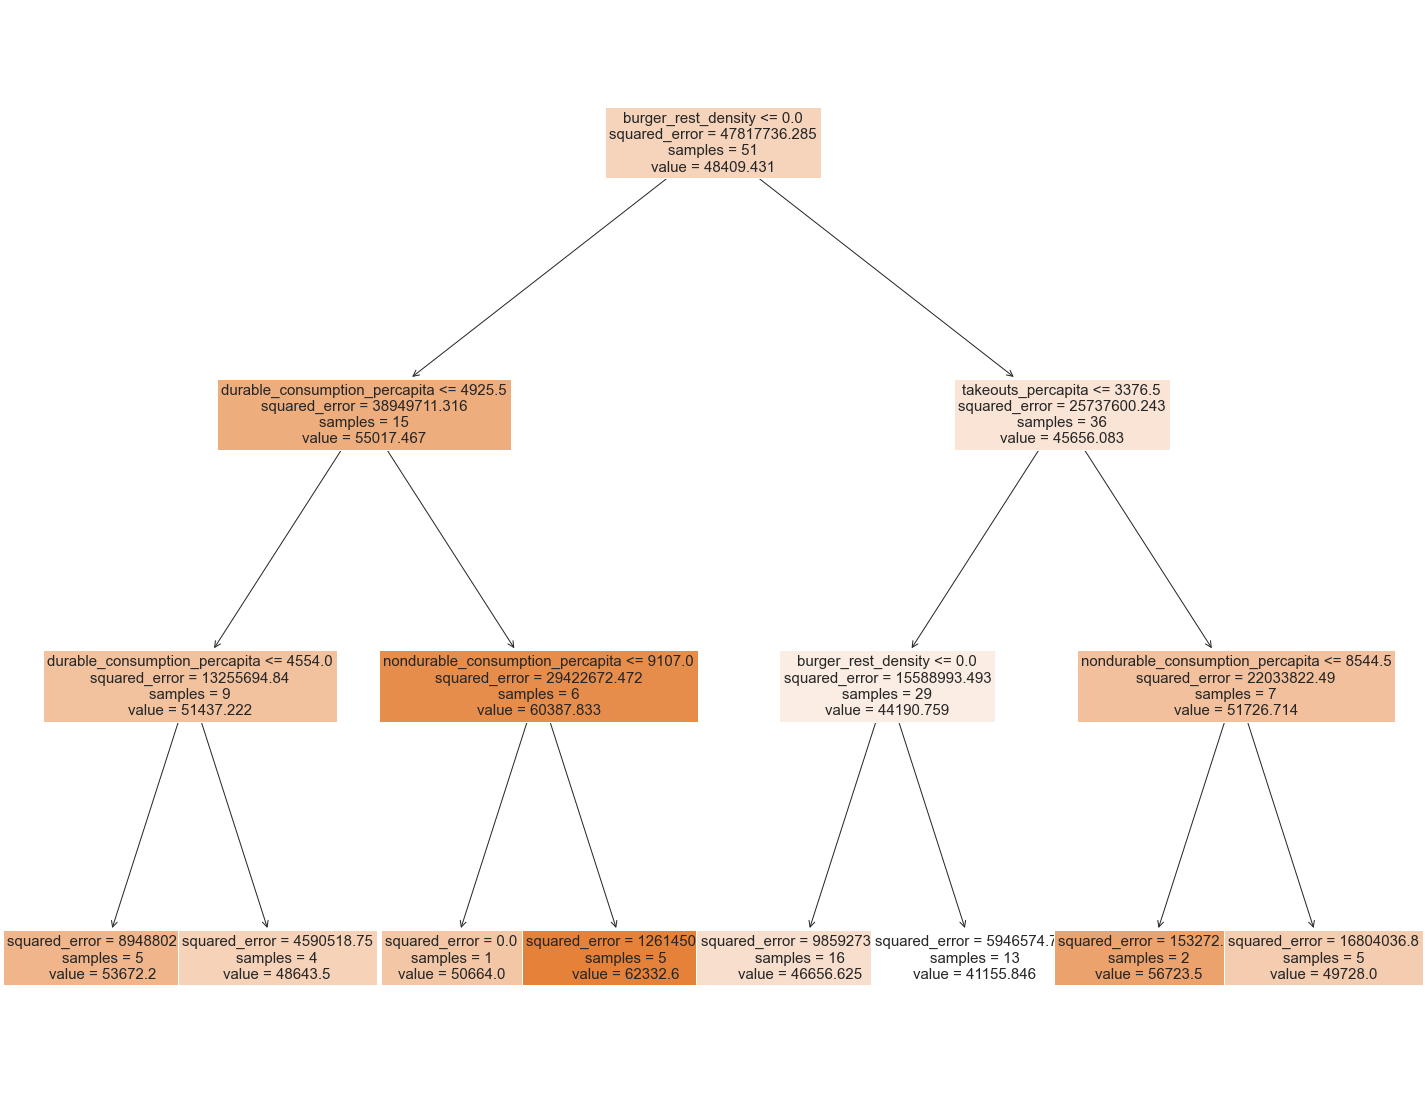

In [78]:
sqrf_fig = plt.figure(figsize=(25,20))
sqrf_fig = tree.plot_tree(income_percapita, feature_names=X.columns, fontsize = 15, filled=True)

Given such independant variables, each cell tries to minimize the error of prediction. The last cell outputs the prediction given a certain path based on the condition of a sample of independant variables. Each branch splits the data in two groups. The first branch splits the data into two internal nodes: durable consumption and takeouts per capita. Income per capita is predicted to be $55017.47 if burger restaurant density is less than zero or $45,656 if burger restaurant density is greater than zero. If the first internal node, durable consumption per capita, is less than or equal to $4925.5, then income per capita is predicted at a value at $51,437.22. Otherwise, income per capita is $60,357.53. If the second internal node, takeouts per capita, is less than or equal to $3376.50, income per capita is predicted to be $44,190.76. Otherwise, income per capita is $51,726.71. Now we reach the second set of internal nodes, containing four nodes. The first two nodes are split by durable and non durable consumption per capita. If durable consumption per capita is less than or equal to $4554, than income per capita is predicted to be $53,672.2. Otherwise, income per capita is $45,643.50 If non durable consumption per capita is less than $9107 then income per capita is $50,664. Otherwise income per captia is $62,332.6. In general, there is an increase in income per capita if non durable, durable, and takeouts per capita increase. This was displayed when visualizing the correlation of each independant variable with respect to income per capita. The error of prediction or the Mean Squared Error (MSE) is extremely high at each node. The MSE is determined by the squared difference between the actual Y value and the predicted Y value. Therefore the metrics of the outcome variable is what drives the magnitude of the MSE. For example, this experiment's outcome variable is income per capita where each of it's values are in the tens of thousands. Therefore, it is likely that the idfference between the actual result and it's predicted value will still be in the thousands; thus, the square of this difference will be in the millions.This is why the nodes in the regression tree all have extremely high errors of prediction. The MSE is a measure of accuracy but has it's limitations in interpretation. Other factors must be considered in order to determine the accuracy and strength of a model such as the p-value, f-statistic, etc.

A regression tree is a good visualization tool to analyze how independant variables interact for the purpose of making more accuracte predictions on the outcome variable. The regression tree also showcases the MSE, the accuracy of a given sequential set of independant variables. Although R squared is just the standardized version of the error of prediction, The MSE shows the error of prediction given a set of inputs. For example, it is evident that the squared error is minimized when burger restaurant density is equal to zero, durable consumption is greater than 4925.5, and non durable consumption per capita is less than or equal to 9107. Given this condition, the MSE is zero, meaning there is no difference between actual income per capita and the model's predicted value. However, the behaviour of the data is the same as OLS regression. If the smaller condition of burger restaurant density will have a higher predicted value of income per capita, and the higher condition for takeouts per capita, durable consumption per capita and non durable consumption per capita will have a higher predicted income per capita. This shows the inverse relationship income per capita has with burger restaurant density and the positive relationship it has with the other three independant variables. 

## 5. Conclusion
Analysts must always understand that correlation does not equal causation. Even if there were a 1 to 1 correlation between both variables, that does not mean that the independant variable is the causal factor for the outcome. Furthermore, there are many explanations that can hinder the strength of a correlation. Economically, factors in this case such as the personal income hypothesis, a households marginal propensity to consume, and the state of the economy all contribute to the non-traditional patterns analyzed from the data. Going back to the moderate correlation between burger restaurant density and disposable income per capita, I cannot infer that this variable is a causal factor in the change in income. I can further explore this relationship by  capturing more data, and use more specific data tools to get more accurate results; however, no matter how much predictive analysis is done, a prediction cannot be guarenteed. ML tools utilized such as OLS regression and the regression tree exposed the accuracy of this relationship. Therefore, it is evident that burger restaurant density is not a causal determinant to income per capita. This is evident due to a moderately low correlation coefficient, high MSEs, and moderate R squared values. However, fast food data and it's relationship to national income can be further explored due to it's backing by microeconomic theory. 
One limitation experienced in this research was the data was aggregated throughout the entire project as values were grouped by state. Given the original dataset and when merging the BEA data on city instead of state, many data points were lost as their were only a few common cities between both data frames. Therefore, A more detailed dataset given could have proven for more accurate results. There was less data to work with, thus, statistical significance and analytical trends have risks of being misleading due to lack of data. Although the Central Limit Theorem states that a sample of n = 30 is enough for the data to converge to the parameter of interest, the data was aggregated at a very high rate in order to prevent data loss.  